# Команда: "Это временное название"
# Проект: Реализация проекта в сфере Data Science

In [1]:
import numpy as np
import pandas as pd
import os
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('/content/dataset.csv')

## Первичный анализ

In [4]:
data

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,...,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,...,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,...,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,...,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

<p>Unnamed: 0 - просто повторяет индексы датасета (можно удалить)</p>
<p>track_id - id песни, случайный набор цифр и латинских букв (скорее всего не понадобится)</p>
<p>artists - имена / псевдонимы артистов. Если их несколько, то указываются через ";".</p>
<p>album_name - название альбома песни</p>
<p>track_name - название песни</p>
<p>popularity - популярность песни, наша таргет переменная. Принимает значения от 0 до 100</p>
<p>duration_ms - длительность песни в миллисекундах</p>
<p>explicit - булевское значение. True - в музыке существует брань. False - отсутствует</p>
<p>danceability - танцевальность песни, значение от 0 до 1</p>
<p>energy - энергичность песни, значение от 0 до 1</p>
<p>key - тональность песни от 0 до 10</p>
<p>loudness - громкость песни, значение десятичная дробь, почему то имеет отрицательные и положительные значения</p>
<p>mode - режим аудиозаписи, значения либо 0 либо 1</p>
<p>speechiness - красноречивость текста песни, значения от 0 до 1</p>
<p>acousticness - качество звука, значение от 0 до 1</p>
<p>instrumentalness - показатель звучания инструментов в песне, значение от 0 до 1</p>
<p>liveness - живость песни, значение от 0 до 1</p>
<p>valence - валентность песни, те её привлекательность для человеческого слуха, значение от 0 до 1</p>
<p>tempo - темп песни, указан в ударах в минуту</p>
<p>time_signature - размер такта, указывает, сколько ударов приходится на каждый такт песни. Значение - цифра от 0 до 4</p>
<p>track_genre - жанр песни</p>

In [6]:
data['popularity'].value_counts()

,count
popularity,
0,16020
22,2354
21,2344
44,2288
1,2140
...,...
96,7
94,7
95,5


In [7]:
data['popularity'].unique()

array([ 73,  55,  57,  71,  82,  58,  74,  80,  56,  69,  52,  62,  54,
        68,  67,  75,  63,  70,   0,   1,  46,  61,  60,  51,  66,  64,
        65,  44,  45,  50,  59,  49,  53,  47,  43,  42,  20,  22,  35,
        19,  24,  18,  23,  40,  38,  41,  30,  37,  39,  48,  36,  34,
        26,  32,  33,  21,  31,  28,  29,  27,  25,  16,   3,  12,   7,
        10,   9,  11,  17,   8,  15,  87,  83,  86,  93,  76,  78,   4,
         2,   5,  85,  81,  84,  72,  79,  77,   6,  13,  14,  89,  96,
       100,  98,  88,  92,  90,  91,  99,  97,  95,  94])

popularity - численное занчение, лежащее от 0 до 100. Большинстов треков имеют низкую оценку или 0 (нет оценки)

In [8]:
data.shape

(114000, 21)

In [9]:
data.isnull().sum()

,0
Unnamed: 0,0
track_id,0
artists,1
album_name,1
track_name,1
popularity,0
duration_ms,0
explicit,0
danceability,0
energy,0


Число пустых колонок мало, по сравнению с общим числом. Просто удалим их.

In [10]:
data = data.dropna()

In [11]:
data.isnull().sum()

,0
Unnamed: 0,0
track_id,0
artists,0
album_name,0
track_name,0
popularity,0
duration_ms,0
explicit,0
danceability,0
energy,0


In [12]:
data.shape

(113999, 21)

Строка с пропусками всего одна 😊

Для следущего шага требуется нам потребуется преобразовать категориальные признаки в удобный числовой формат, для этого используем следущие 2 ячейки

In [13]:
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()
label_encoders = {}

In [14]:
from sklearn.preprocessing import LabelEncoder
for col in categorical_cols:
  le = LabelEncoder()
  data[col] = le.fit_transform(data[col])
  label_encoders[col] = le
#Пробежались по всем категориальным колонками и закодировали при помощи LabelEncoder()

<ipython-input-14-9130fca26d06>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col] = le.fit_transform(data[col])
<ipython-input-14-9130fca26d06>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col] = le.fit_transform(data[col])
<ipython-input-14-9130fca26d06>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/use

Сейчас проверим какие характеристики наиболее сильно коррелируют между собой, чтобы окончательно понять какие данные нам нужны и частично закрыть Feature Engineering.

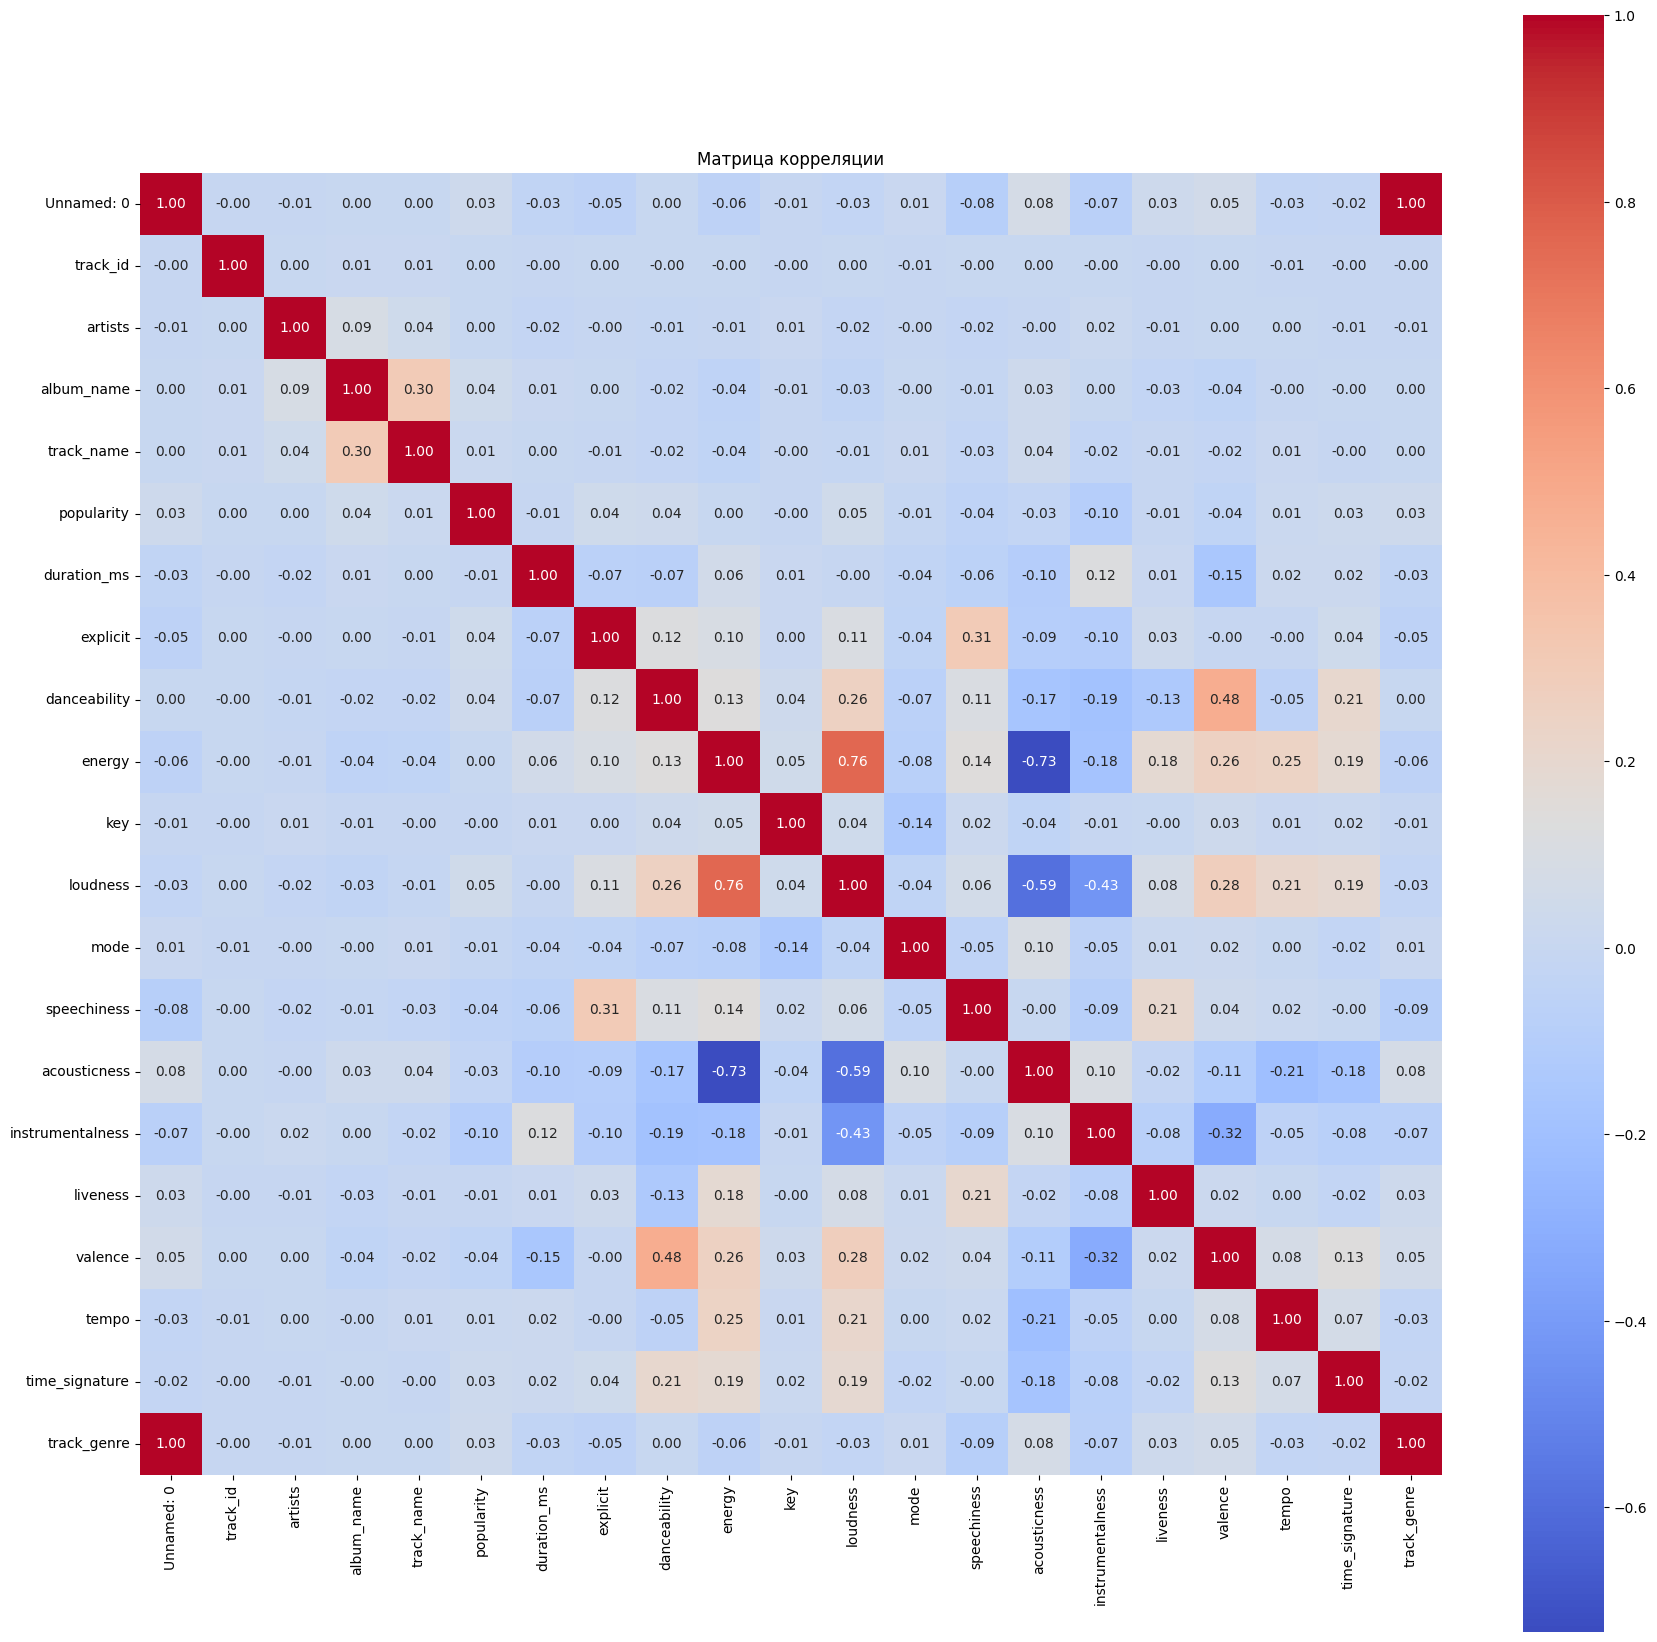

In [15]:
corr_matrix = data.corr()
plt.figure(figsize=(21, 21))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Матрица корреляции')
plt.show()

<p>Из диаграммы выше можно сделать 3 ужасающих вывода:</p>
<p>1 - ID записи в таблице <i>(Unnamed: 0)</i> каким-то образом хранят в себе информацию о жанре трека <i>(track_genre)</i>, стоящего в данной записи. (Записи в датасете сгруппированы по жанрам <i>(track_genre)</i>, видимо их в таком порядке и записывали. Потому и возникла корреляция) Что к счастью не важно, тк первый столбец мы уже решили удалить)</p>
<p>2 - С популярностью <i>(popularity)</i> особой корреляции не у одной из характеристик нет. Что говорит нам о многофакторности явления популярности, возможно, мы сможем выявить идеальные прараметры для популярной песни, этим мы и займёмся</p>
<p>3 - Существует корреляция между loudness, energy и acousticness. Причём у energy с loudness прямая, а у energy с acousticness обратная.</p>
<p>Как таковую пользу нам приносит только 3й факт, возможно мы объединим эти столбцы</p>

Сделаем копию оригинального датасета, чтобы иметь возможность работать с категориальными признаками в их оригинальном виде

In [16]:
origin_data = pd.read_csv('/content/dataset.csv')
origin_data = origin_data.dropna()

Разделим характеристики по признакам

In [17]:
numerical_features = origin_data.select_dtypes(include=['number']).columns.tolist() #числовые признаки
categorical_features = origin_data.select_dtypes(include=['object']).columns.tolist() #категориальные признаки

Уберём ненужное

In [18]:
numerical_features.pop(0)

'Unnamed: 0'

In [19]:
numerical_features.pop(0)

'popularity'

In [20]:
numerical_features

['duration_ms',
 'danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'time_signature']

## Анализ числовых характеристик

<p>Мы решили разбить данные на 3 категории:</p>
<p>- 1ая Самые популярные песни <i>(popularity > 90)</i></p>
<p>- 2ая Средние <i>(40 <= popularity <= 90 )</i></p>
<p>- 3я Непопулярные <i>(popularity < 40)</i></p>
<p>Целью было выявить типичные для каждой группы признаки и сравнить их с другими группами</p>
<p>Нужно отметить, что нам стоит сосредоточиться на различиях между типичными значениями самых популярных песен (красная линия) и средних (зелёная линия). Так как в непопулярных песнях большое число песен с нулевой популярностью, но как показала практика медианное значение 2ой и 3й группы различаются довольно редко.</p>

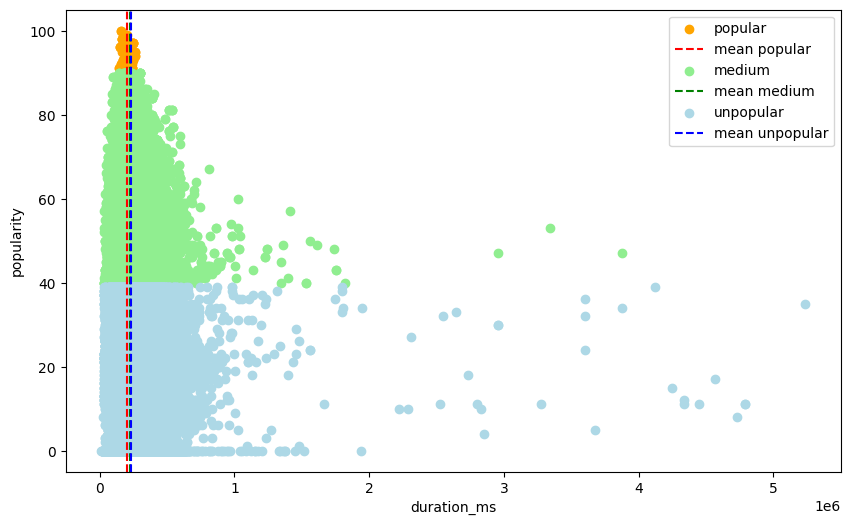

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


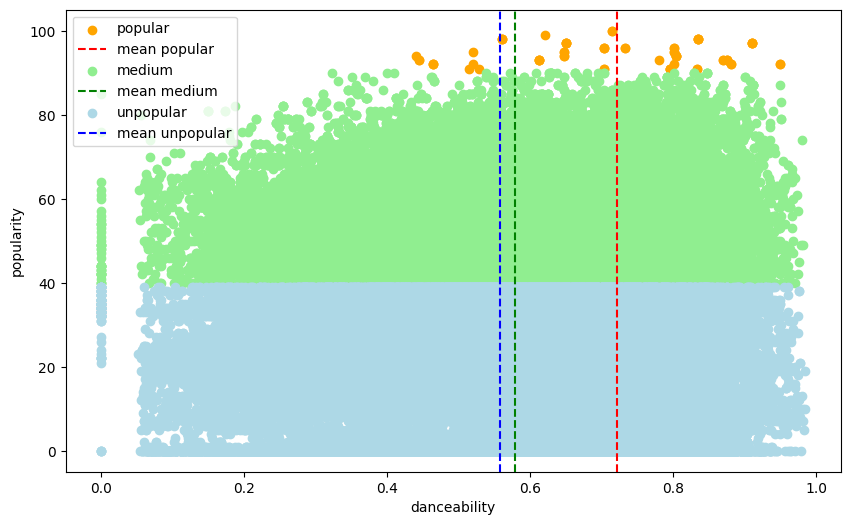

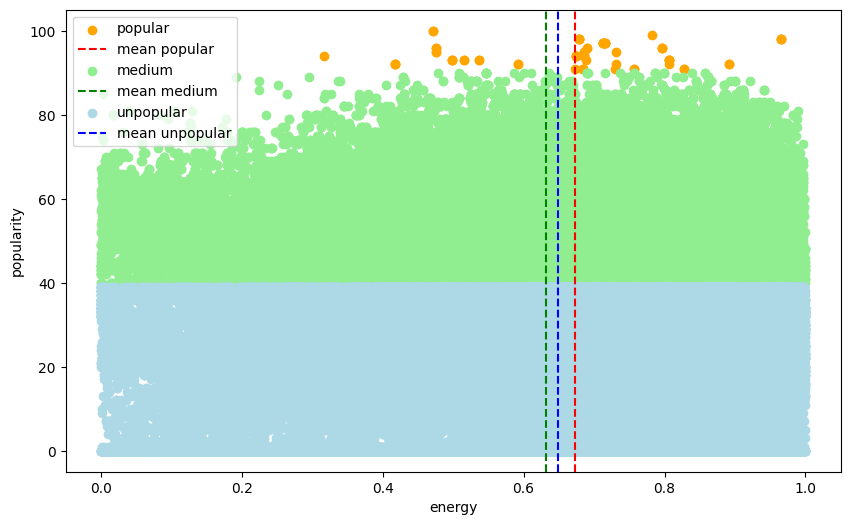

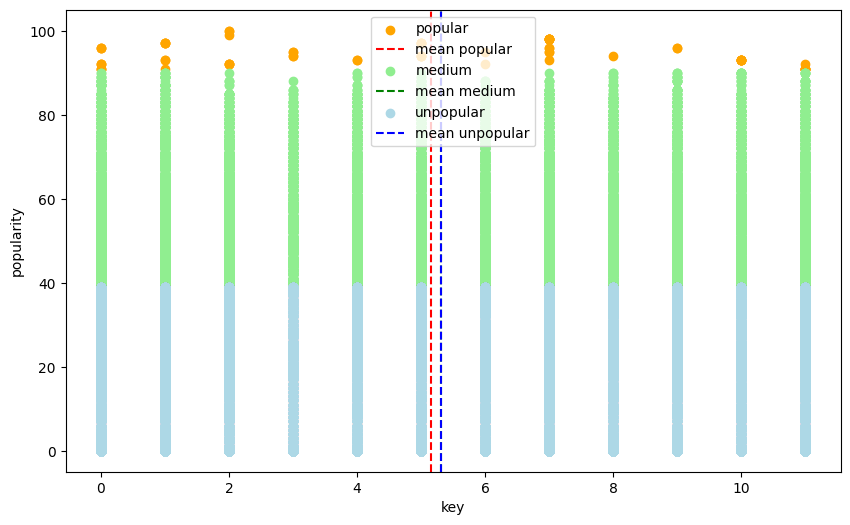

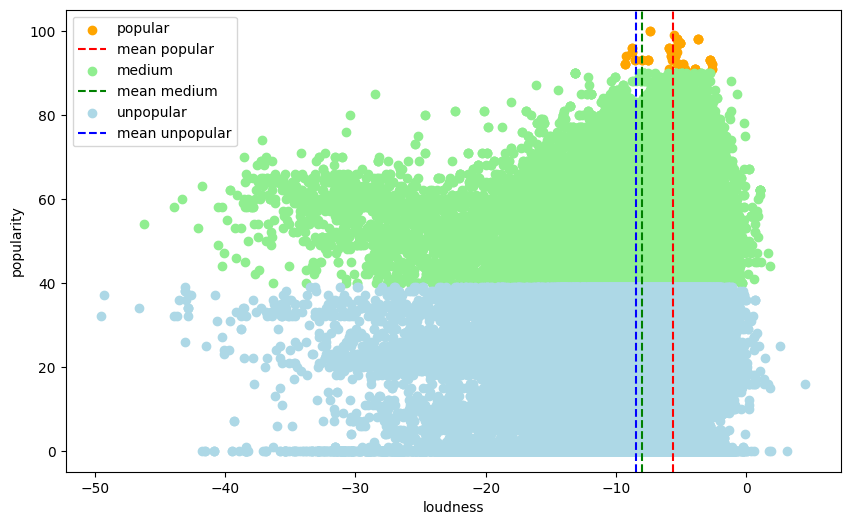

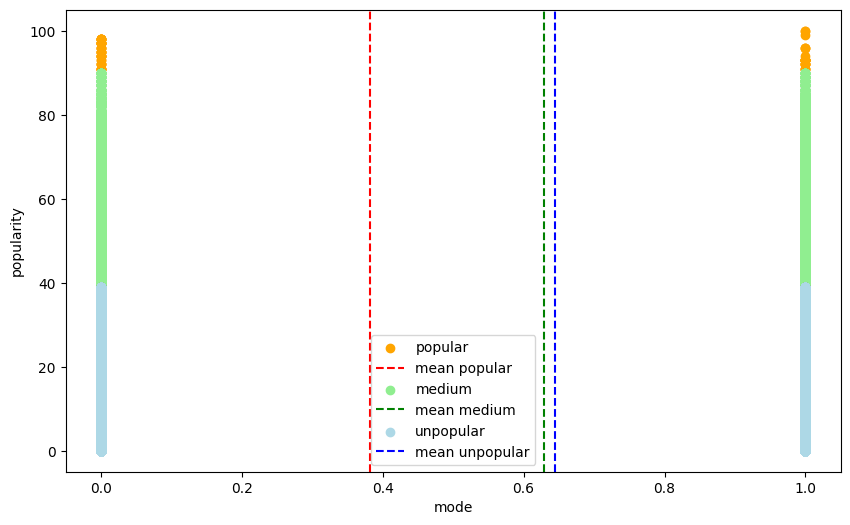

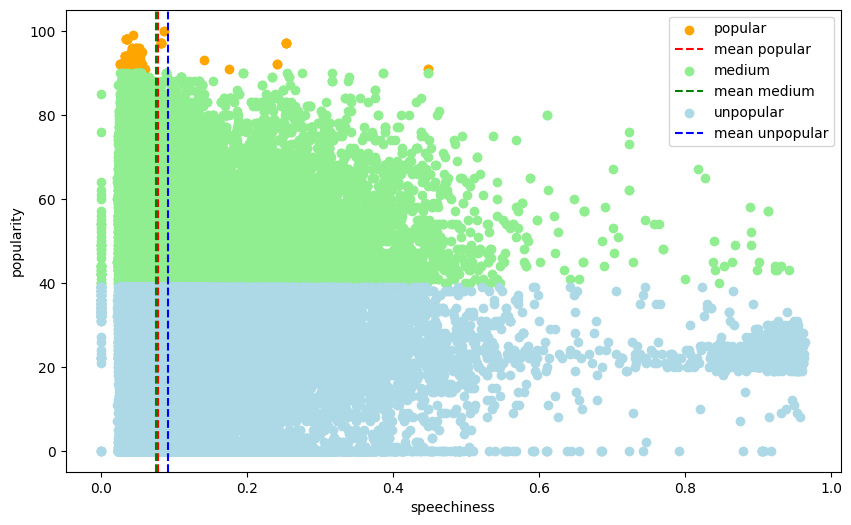

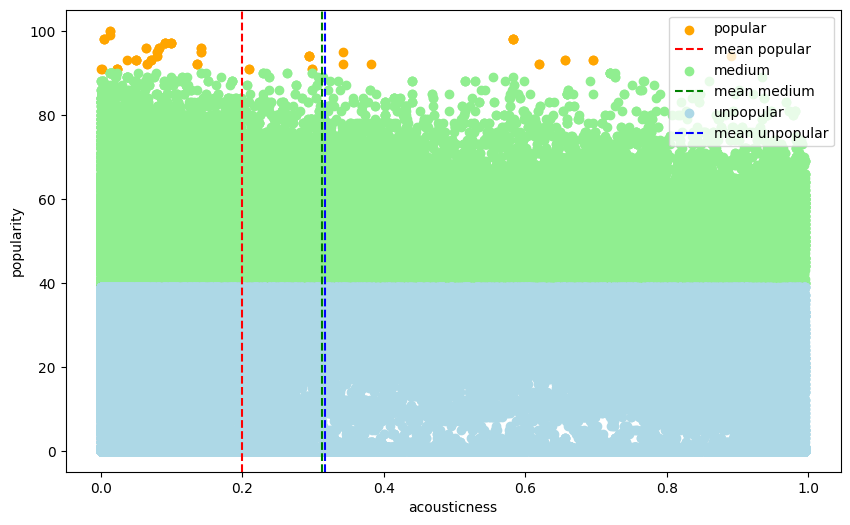

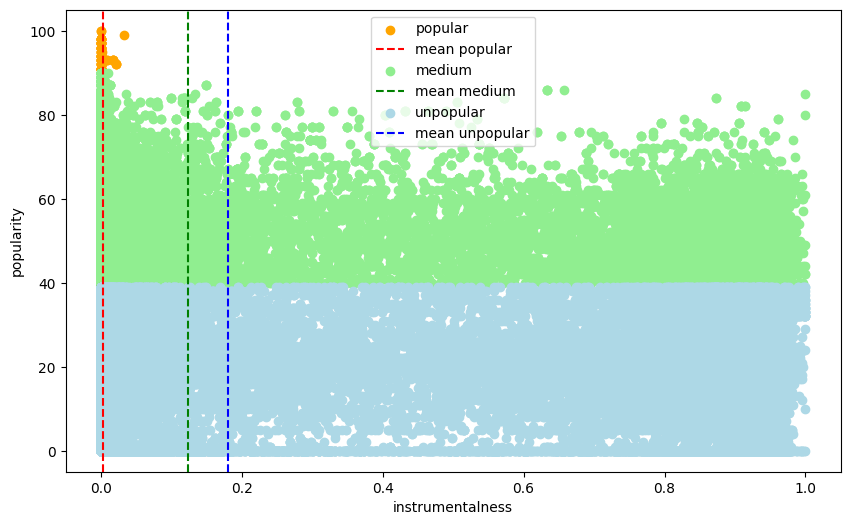

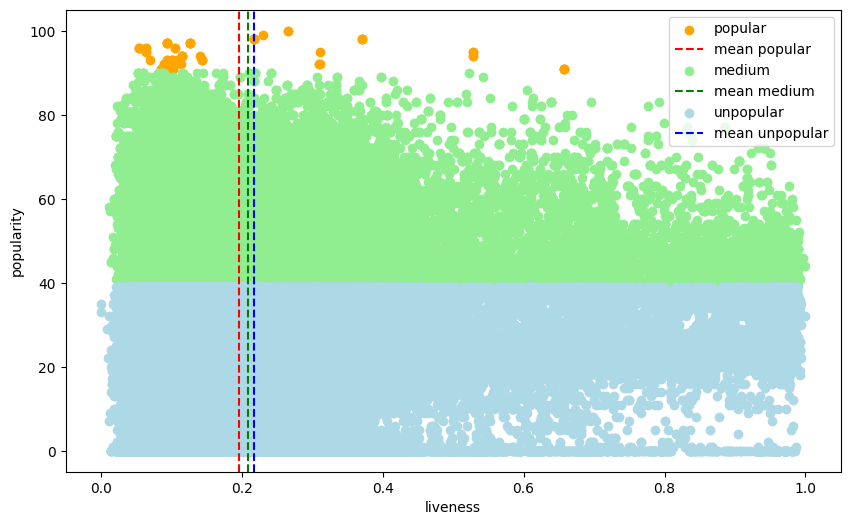

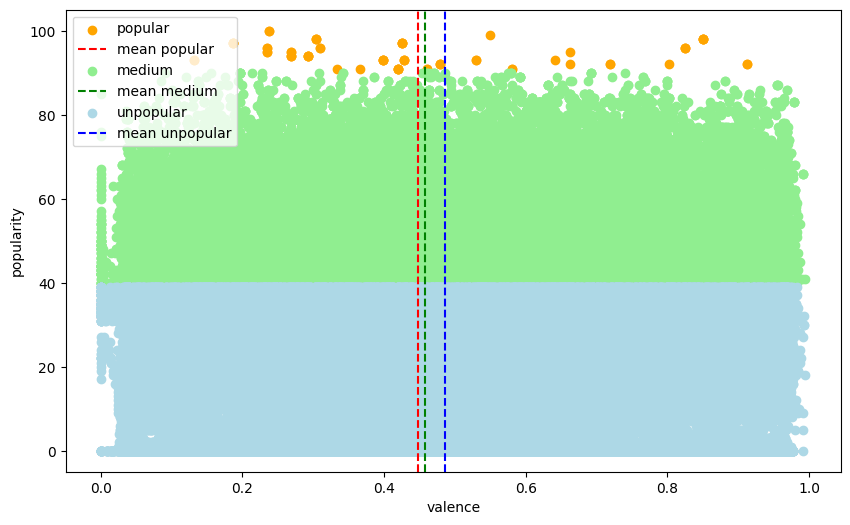

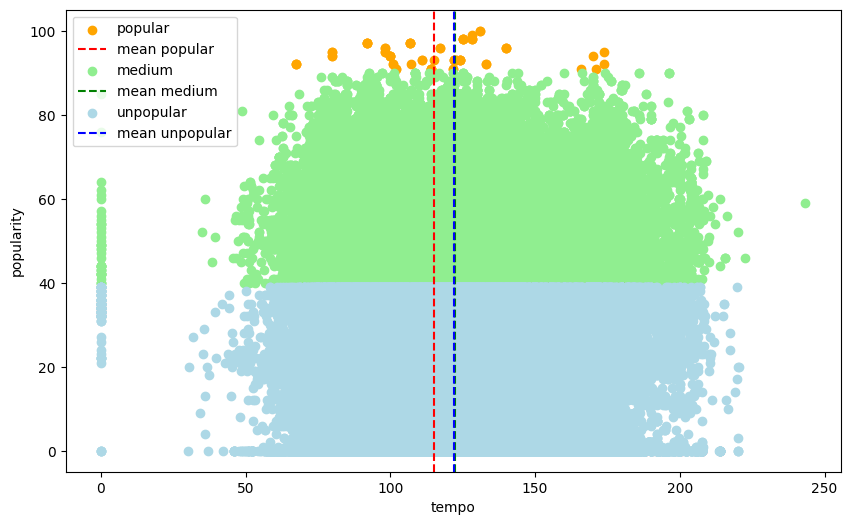

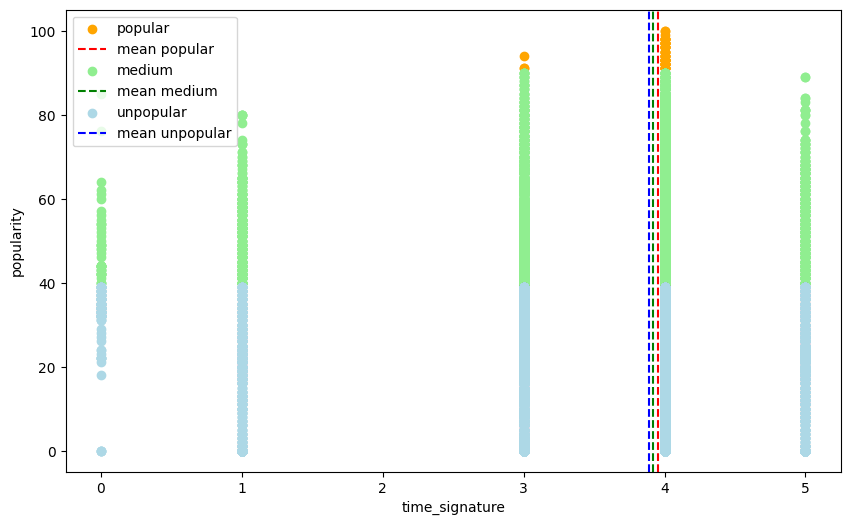

In [84]:
for numerical_feature in numerical_features:
  popular = data[data['popularity'] > 90]
  unpopular = data[data['popularity'] < 40]
  medium = data[data['popularity'] >= 40]
  medium = medium[medium['popularity'] <= 90]

  plt.figure(figsize=(10, 6))

  plt.scatter(popular[numerical_feature], popular['popularity'], c='orange', label='popular')
  plt.axvline(x=popular[numerical_feature].mean(), color='red', linestyle='--', label='mean popular')

  plt.scatter(medium[numerical_feature], medium['popularity'], c='lightgreen', label='medium')
  plt.axvline(x=medium[numerical_feature].mean(), color='green', linestyle='--', label='mean medium')

  plt.scatter(unpopular[numerical_feature], unpopular['popularity'], c='lightblue', label='unpopular')
  plt.axvline(x=unpopular[numerical_feature].mean(), color='blue', linestyle='--', label='mean unpopular')

  plt.legend()

  plt.xlabel(numerical_feature)
  plt.ylabel('popularity')

  plt.show()

## Выводы:

### duration_ms

<p>Про длительность трека ничего особенного не скажешь, разве что долгие треки встречаются редко и популярность их крайне мала.</p>
<p>Поэтому обрежем данные 5ю минутами и приведём график из ms в min</p>
<p></p>

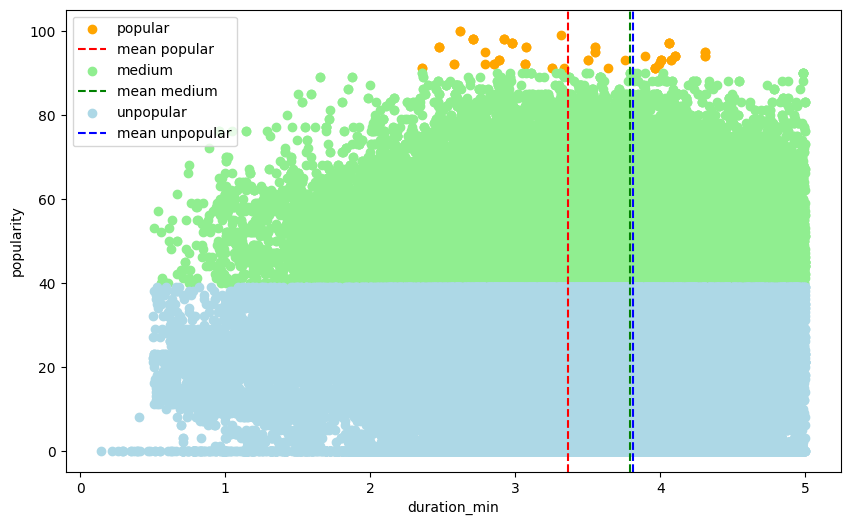

In [85]:
popular = data[data['popularity'] > 90]
unpopular = data[data['popularity'] < 40]
medium = data[data['popularity'] >= 40]
medium = medium[medium['popularity'] <= 90]

popular_med_duration_ms = popular['duration_ms'].mean()
medium_med_duration_ms = medium['duration_ms'].mean()
unpopular_med_duration_ms = unpopular['duration_ms'].mean()

popular = popular[popular['duration_ms'] < 5 * 1000 * 60]
medium = medium[medium['duration_ms'] < 5 * 1000 * 60]
unpopular = unpopular[unpopular['duration_ms'] < 5 * 1000 * 60]

plt.figure(figsize=(10, 6))

plt.scatter(popular['duration_ms'] / (1000 * 60), popular['popularity'], c='orange', label='popular')
plt.axvline(x=popular_med_duration_ms / (1000 * 60), color='red', linestyle='--', label='mean popular')

plt.scatter(medium['duration_ms'] / (1000 * 60), medium['popularity'], c='lightgreen', label='medium')
plt.axvline(x=medium_med_duration_ms / (1000 * 60), color='green', linestyle='--', label='mean medium')

plt.scatter(unpopular['duration_ms'] / (1000 * 60), unpopular['popularity'], c='lightblue', label='unpopular')
plt.axvline(x=unpopular_med_duration_ms / (1000 * 60), color='blue', linestyle='--', label='mean unpopular')

plt.legend()

plt.xlabel('duration_min')
plt.ylabel('popularity')

plt.show()

<p>Теперь можно уверенно сказать, что все группы имеют примерно одинаковую среднюю длительность, однако самые популярные треки находятся в пределе от 2,5 до 4,5 минут</p>
<p></p>
<p></p>
<p></p>
<p></p>

### danceability

<p>Что касается графика danceability, можно сразу сказать, что Самые популярные треки имеют большой danceability (больше 0.5), что сильно выделяет их среди других групп</p>


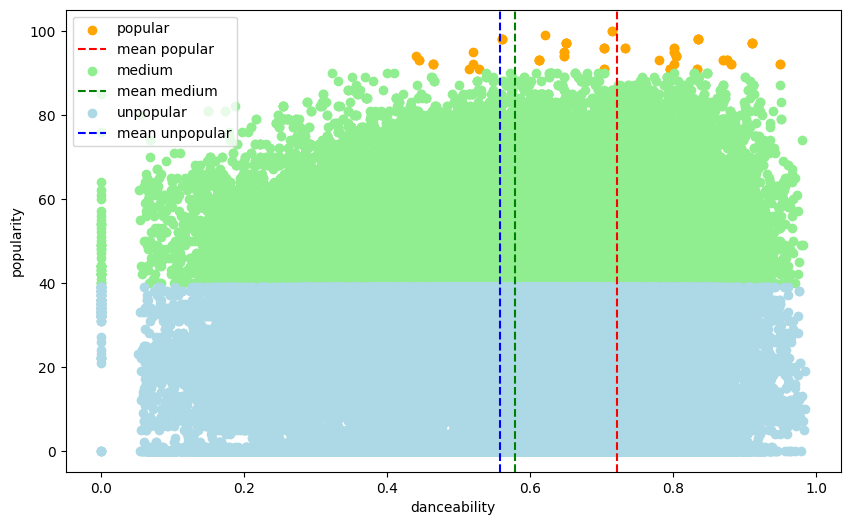

### energy_loudness_acousticness

Было решено оставить data в таком состоянии, чтобы сравнить имели ли наши изменения хорошими или нет

In [21]:
working_data = data

Как было уже замечено loudness, energy и acousticness имеют между собой корреляцию. Из этих соображний делаем следущее:

In [22]:
#Объединяем всё в energy_loudness_acousticness
working_data['energy_loudness_acousticness'] = data['energy'] * data['loudness'] * (1 - data['acousticness'])
#acousticness имеет обратную корреляцию

working_data = working_data.drop(columns=['Unnamed: 0', 'track_id']) # за ненадобностью
working_data = working_data.drop(columns=['energy', 'loudness', 'acousticness']) # убираем дубли (возможно это сделает хуже)

<ipython-input-22-6dc0fc3a0721>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  working_data['energy_loudness_acousticness'] = data['energy'] * data['loudness'] * (1 - data['acousticness'])


In [25]:
working_data

,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,key,mode,speechiness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,energy_loudness_acousticness
0,10357,8100,11741,73,230666,False,0.676,1,0,0.1430,0.000001,0.3580,0.7150,87.917,4,0,-3.009767
1,3287,14796,22528,55,149610,False,0.420,1,1,0.0763,0.000006,0.1010,0.2670,77.489,4,0,-0.217437
2,12397,39162,60774,57,210826,False,0.438,0,1,0.0557,0.000000,0.1170,0.1200,76.332,4,0,-2.760660
3,14839,8580,9580,71,201933,False,0.266,0,1,0.0363,0.000071,0.1320,0.1430,181.740,3,0,-0.104832
4,5255,16899,25689,82,198853,False,0.618,2,1,0.0526,0.000000,0.0829,0.1670,119.949,4,0,-2.277291
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,22486,66,53329,21,384999,False,0.172,5,1,0.0422,0.928000,0.0863,0.0339,125.995,5,113,-1.386848
113996,22486,66,65090,22,385000,False,0.174,0,0,0.0401,0.976000,0.1050,0.0350,85.239,4,113,-0.012859
113997,4952,5028,38207,22,271466,False,0.629,0,0,0.0420,0.000000,0.0839,0.7430,132.378,4,113,-0.476733
113998,18534,7238,21507,41,283893,False,0.587,7,1,0.0297,0.000000,0.2700,0.4130,135.960,4,113,-3.410587


Теперь проверим новую характеристику - energy_loudness_acousticness


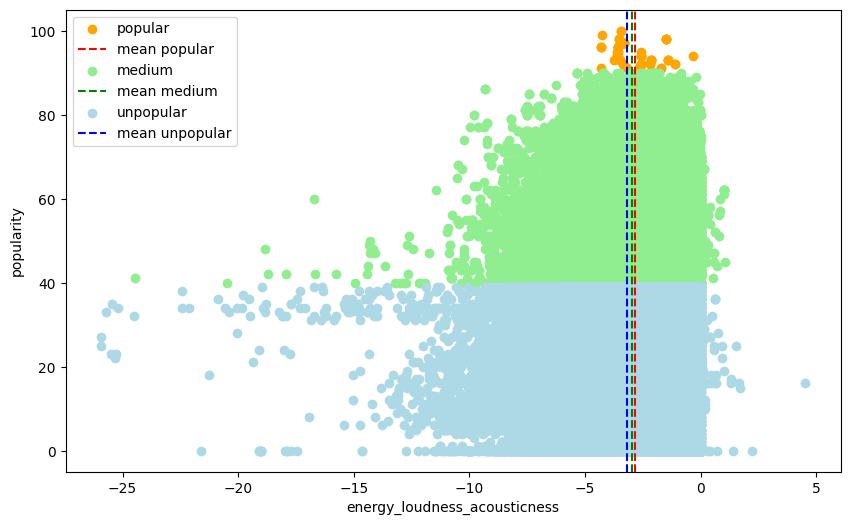

In [23]:
popular = working_data[working_data['popularity'] > 90]
unpopular = working_data[working_data['popularity'] < 40]
medium = working_data[working_data['popularity'] >= 40]
medium = medium[medium['popularity'] <= 90]

plt.figure(figsize=(10, 6))

plt.scatter(popular['energy_loudness_acousticness'], popular['popularity'], c='orange', label='popular')
plt.axvline(x=popular['energy_loudness_acousticness'].mean(), color='red', linestyle='--', label='mean popular')

plt.scatter(medium['energy_loudness_acousticness'], medium['popularity'], c='lightgreen', label='medium')
plt.axvline(x=medium['energy_loudness_acousticness'].mean(), color='green', linestyle='--', label='mean medium')

plt.scatter(unpopular['energy_loudness_acousticness'], unpopular['popularity'], c='lightblue', label='unpopular')
plt.axvline(x=unpopular['energy_loudness_acousticness'].mean(), color='blue', linestyle='--', label='mean unpopular')

plt.legend()

plt.xlabel('energy_loudness_acousticness')
plt.ylabel('popularity')

plt.show()

Ситуация таже, что и с duration_ms. Обрежем от -5 до 0

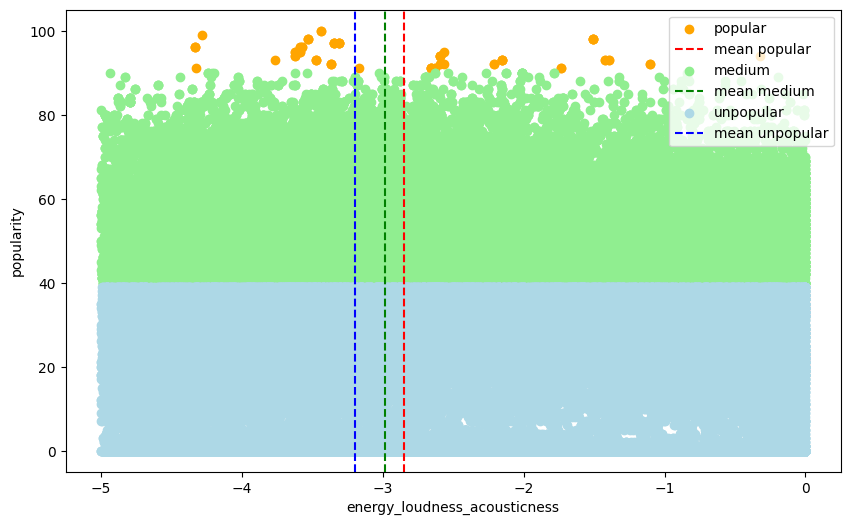

In [24]:
tempo_data = working_data[working_data['popularity'] > 90]
popular_med = tempo_data['energy_loudness_acousticness'].mean()

tempo_data = working_data[working_data['popularity'] >= 40]
tempo_data = tempo_data[tempo_data['popularity'] >= 40]
medium_med = tempo_data['energy_loudness_acousticness'].mean()

tempo_data = working_data[working_data['popularity'] < 40]
unpopular_med = tempo_data['energy_loudness_acousticness'].mean()

tempo_data = working_data[working_data['energy_loudness_acousticness'] > -5]
tempo_data = tempo_data[tempo_data['energy_loudness_acousticness'] < 0]

popular = tempo_data[tempo_data['popularity'] > 90]
unpopular = tempo_data[tempo_data['popularity'] < 40]
medium = tempo_data[tempo_data['popularity'] >= 40]
medium = medium[medium['popularity'] <= 90]

plt.figure(figsize=(10, 6))

plt.scatter(popular['energy_loudness_acousticness'], popular['popularity'], c='orange', label='popular')
plt.axvline(x=popular_med, color='red', linestyle='--', label='mean popular')

plt.scatter(medium['energy_loudness_acousticness'], medium['popularity'], c='lightgreen', label='medium')
plt.axvline(x=medium_med, color='green', linestyle='--', label='mean medium')

plt.scatter(unpopular['energy_loudness_acousticness'], unpopular['popularity'], c='lightblue', label='unpopular')
plt.axvline(x=unpopular_med, color='blue', linestyle='--', label='mean unpopular')

plt.legend()

plt.xlabel('energy_loudness_acousticness')
plt.ylabel('popularity')

plt.show()

Особо средние значения групп не отличаются, но значения Самых лучших песен опять ограничено небольшим промежутком, в данном случае от -4.5 до -0.5

### key

Про key тоже ничего особенного не скажешь, медианы сливаются, да и так анализировать подобный вид графика не имеет смысла

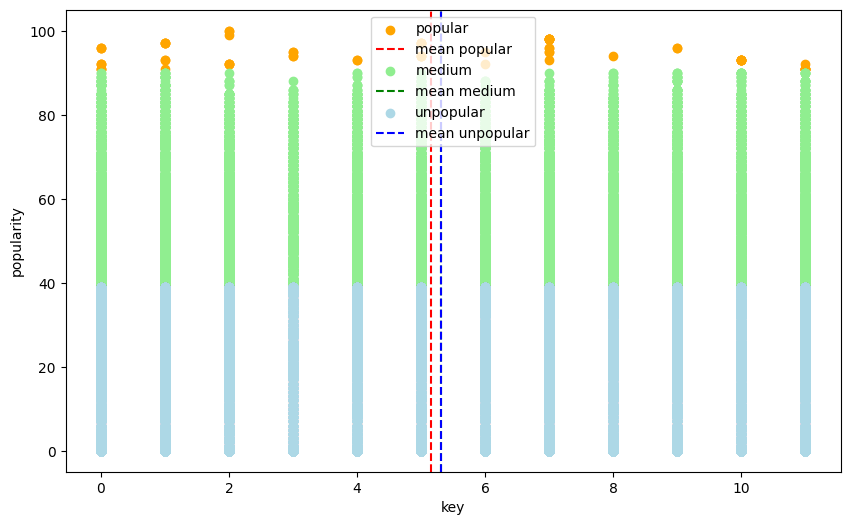

Поэтому просто выведем вероятность стать популярным для каждого key

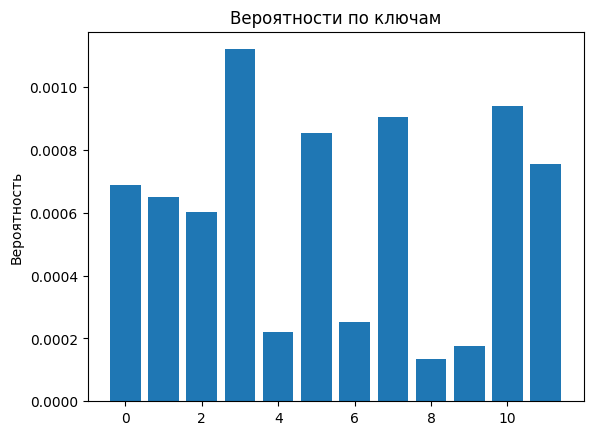

In [28]:
best_d = data[data['popularity'] > 90]
key_list = []
ver_list = []
for key in data['key'].unique():
  ver = best_d[ best_d['key'] == key ]['key'].count() / data[ data['key'] == key ]['key'].count()
  key_list.append(key)
  ver_list.append(ver)


fig, ax = plt.subplots()


ax.bar(key_list, ver_list)

ax.set_ylabel('Вероятность')
ax.set_title('Вероятности по ключам')

plt.show()

Вероятности скачут в пределе 0.001, что довольно мало, поэтому мы решили удалить эту колонку

In [29]:
working_data = working_data.drop(columns=['key'])
working_data

,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,mode,speechiness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,energy_loudness_acousticness
0,10357,8100,11741,73,230666,False,0.676,0,0.1430,0.000001,0.3580,0.7150,87.917,4,0,-3.009767
1,3287,14796,22528,55,149610,False,0.420,1,0.0763,0.000006,0.1010,0.2670,77.489,4,0,-0.217437
2,12397,39162,60774,57,210826,False,0.438,1,0.0557,0.000000,0.1170,0.1200,76.332,4,0,-2.760660
3,14839,8580,9580,71,201933,False,0.266,1,0.0363,0.000071,0.1320,0.1430,181.740,3,0,-0.104832
4,5255,16899,25689,82,198853,False,0.618,1,0.0526,0.000000,0.0829,0.1670,119.949,4,0,-2.277291
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,22486,66,53329,21,384999,False,0.172,1,0.0422,0.928000,0.0863,0.0339,125.995,5,113,-1.386848
113996,22486,66,65090,22,385000,False,0.174,0,0.0401,0.976000,0.1050,0.0350,85.239,4,113,-0.012859
113997,4952,5028,38207,22,271466,False,0.629,0,0.0420,0.000000,0.0839,0.7430,132.378,4,113,-0.476733
113998,18534,7238,21507,41,283893,False,0.587,1,0.0297,0.000000,0.2700,0.4130,135.960,4,113,-3.410587


### mode

Про mode можно однозначно сказать, что вероятность стать популярным выше пре mode = 0

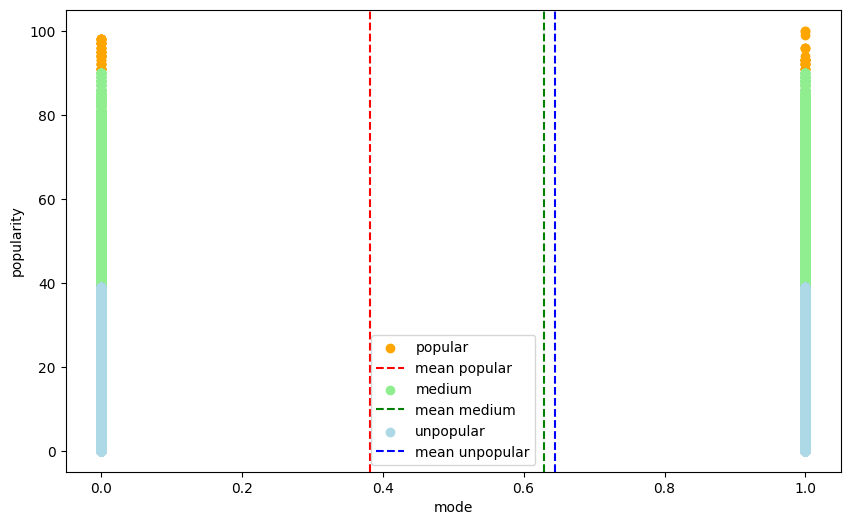

### speechiness

<p>speechiness: Это кажется странным, но самые популярные песни сконцентрированны около нуля. Можно сделать вывод, что красноречивость не особо важна для популярности, хотя и существуют маленькие выбросы около 0,4 speechiness</p>
<p>Однако, сердние значения наших групп особо не отличаются, что говорит нам о слабой разнице по этому параметру</p>

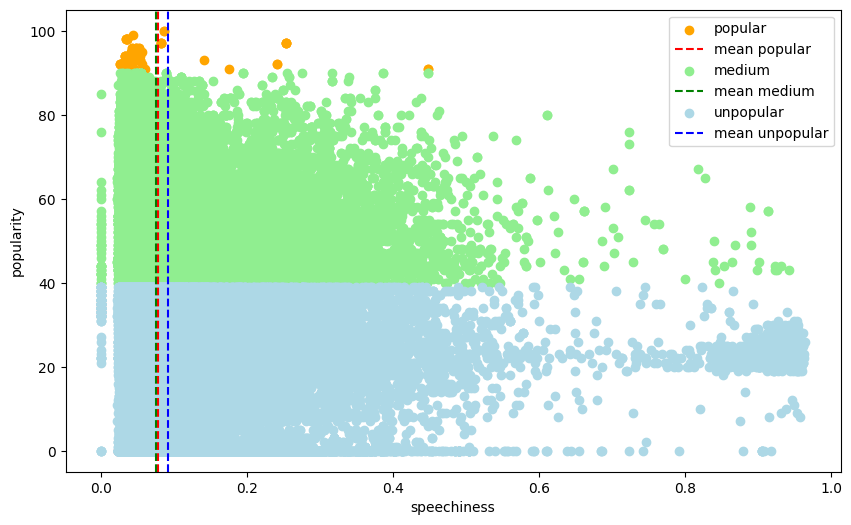

### instrumentalness

instrumentalness: треки с instrumentalness > 0.05 не становились самыми популярными, разница типичных представителей наших групп обльше 0.1, что в наших условиях довлольно много

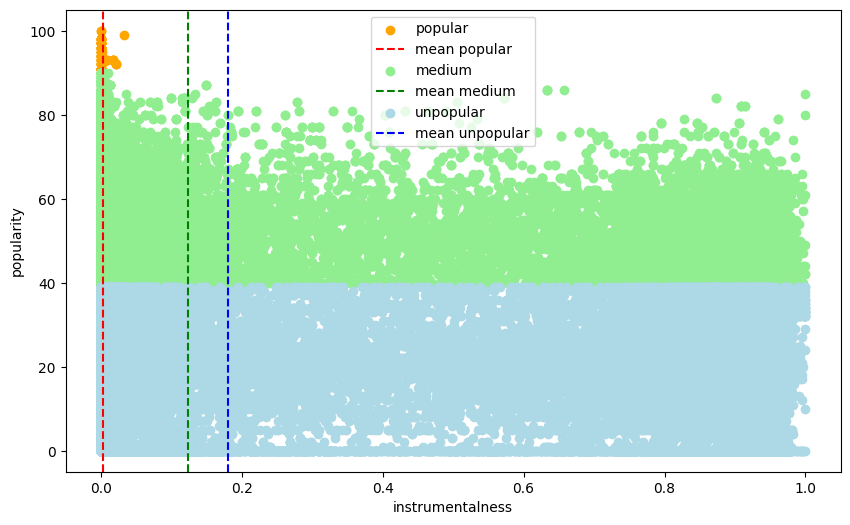

### liveness

liveness нам мало о чём говорит, медианы слишком близко друг к другу, а группа самых популярных разбилась на маленькие группки вдоль всей линии, уменьшаясь по мере роста liveness. Можно сделать вывод, что студийное исполнение популярнее живого перед зрителями

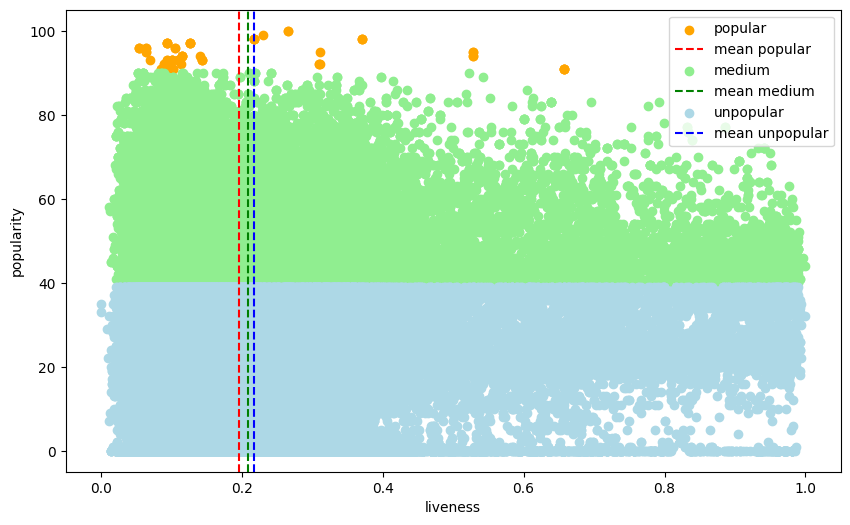

### valence_tempo

<p>Два следующих графика не дают нам той информации, которую мы ищем, тк медианы очень близко друг к другу, и точки почти симметрично распределились по осям (можем это утверждать,тк медианы очень близки к центру картинки)</p>
<p>Было решено оставить эти параметры, так как достойных аргументов для их удаления я не нашёл</p>

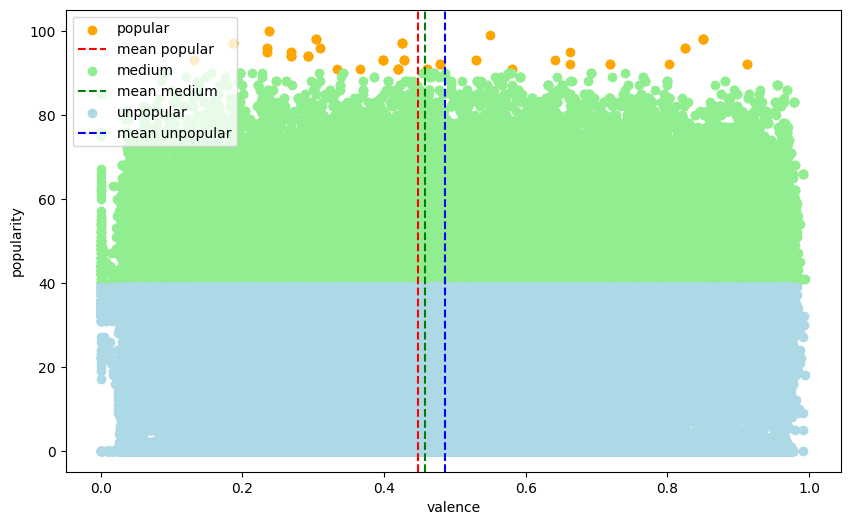

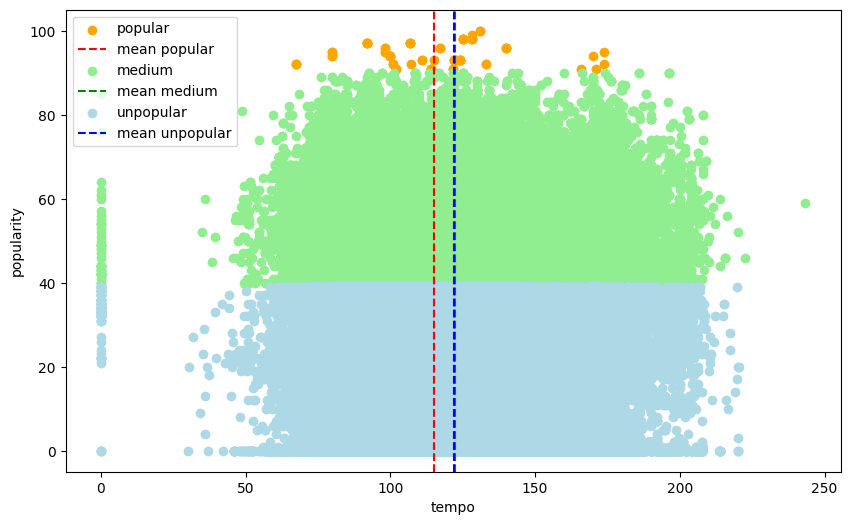

### time_signature

time_signature: Самые популярные треки расположенны на 3й и 4й позиции, больше всего шанс у треков с 5ой позицией.
Треков на второй позиции почему-то нет)

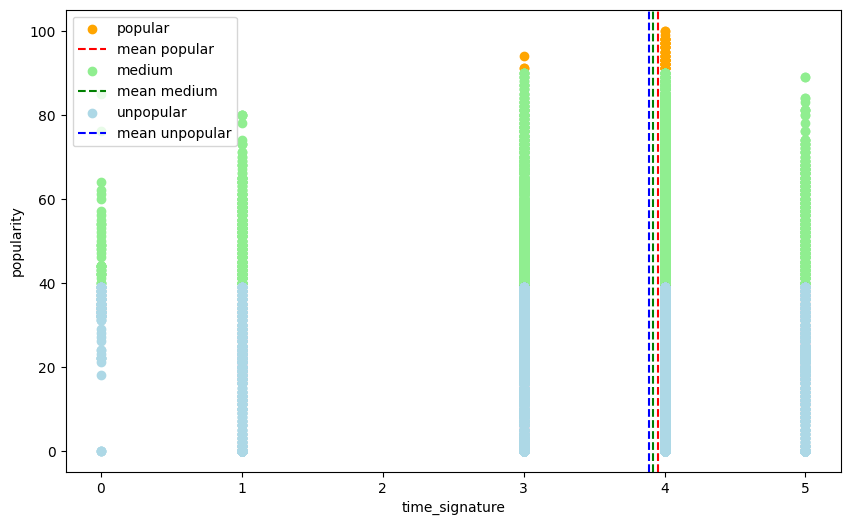

Но у нас есть ещё и категориальные признаки!

## Анализ категориальных признаков

In [30]:
categorical_features

['track_id', 'artists', 'album_name', 'track_name', 'track_genre']

Уберём track_id

In [31]:
categorical_features.pop(0)

'track_id'

### Топ исполнители

Выведем топ исполнителей с самыми лучшими треками

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, 'Mora;Feid'),
  Text(1, 0, 'Beach Weather'),
  Text(2, 0, 'Ruth B.'),
  Text(3, 0, 'Shakira;Rauw Alejandro'),
  Text(4, 0, 'The Weeknd;Gesaffelstein'),
  Text(5, 0, 'Bad Bunny;Rauw Alejandro'),
  Text(6, 0, 'Elley Duhé'),
  Text(7, 0, 'Bad Bunny;Tony Dize'),
  Text(8, 0, 'Luar La L'),
  Text(9, 0, 'Drake;21 Savage'),
  Text(10, 0, 'Rauw Alejandro;Lyanno;Brray'),
  Text(11, 0, 'Harry Styles'),
  Text(12, 0, 'Rema;Selena Gomez'),
  Text(13, 0, 'Beyoncé'),
  Text(14, 0, 'Joji'),
  Text(15, 0, 'Bad Bunny;Bomba Estéreo'),
  Text(16, 0, 'Bad Bunny;Chencho Corleone'),
  Text(17, 0, 'Manuel Turizo'),
  Text(18, 0, 'Bizarrap;Quevedo'),
  Text(19, 0, 'Sam Smith;Kim Petras')])

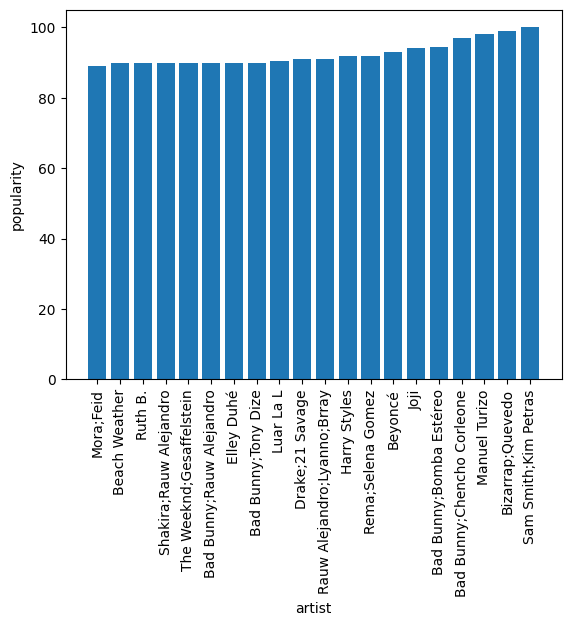

In [32]:
popular_artists = origin_data.groupby('artists')['popularity'].mean()
best = pd.DataFrame(popular_artists.sort_values().tail(20))

plt.bar(list(best.index), list(best.popularity))
plt.xlabel('artist')
plt.ylabel('popularity')
plt.xticks(rotation=90)

Ни одного из этих исполнителей я не знаю(

Но! Было замечено, что в некоторых треках присутствует несколько исполнителей, это нужно отразить в датасете! Вдруг колаборации имеют большую популярность, чем обычные треки. Или дуэты более популярны, чем соло исполнения

### Новая числовая характеристика - число исполнителей

In [25]:
working_data['artists_cnt'] = 0
for i in origin_data.index:
  working_data.loc[i, "artists_cnt"] = origin_data['artists'][i].count(';') + 1
working_data['artists_cnt']

,artists_cnt
0,1
1,1
2,2
3,1
4,1
...,...
113995,1
113996,1
113997,1
113998,1


Сделаем уже традиционный график и для этого показателя

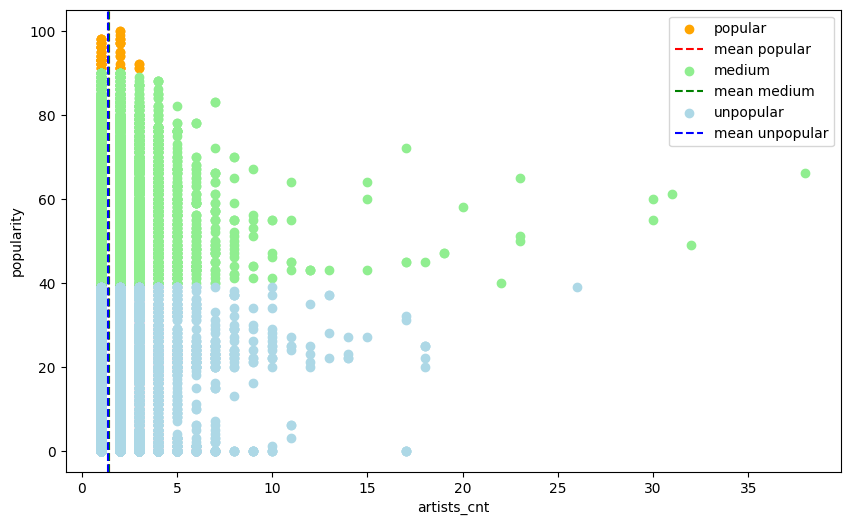

Идеальное число для коллаборации - 1.411764705882353


In [26]:
popular = working_data[working_data['popularity'] > 90]
unpopular = working_data[working_data['popularity'] < 40]
medium = working_data[working_data['popularity'] >= 40]
medium = medium[medium['popularity'] <= 90]

perfect_artists_cnt = popular['artists_cnt'].mean()

plt.figure(figsize=(10, 6))

plt.scatter(popular['artists_cnt'], popular['popularity'], c='orange', label='popular')
plt.axvline(x=perfect_artists_cnt, color='red', linestyle='--', label='mean popular')

plt.scatter(medium['artists_cnt'], medium['popularity'], c='lightgreen', label='medium')
plt.axvline(x=medium['artists_cnt'].mean(), color='green', linestyle='--', label='mean medium')

plt.scatter(unpopular['artists_cnt'], unpopular['popularity'], c='lightblue', label='unpopular')
plt.axvline(x=unpopular['artists_cnt'].mean(), color='blue', linestyle='--', label='mean unpopular')

plt.legend()

plt.xlabel('artists_cnt')
plt.ylabel('popularity')

plt.show()

print(f'Идеальное число для коллаборации - {perfect_artists_cnt}')

<p>Медианы сливаются - значит, что наш критерий особо не выделяет популярные песни, но можно сказать, что популярные треки имеют от 1го до 3х исполнителей</p>


### Преобразуем категориальную характеристику artists в числовую, через среднее арифметическое популярности их песен

<p>Наверно нам стоит выделить популярных и не популярных певцов, через среднее арифмитическое их песен</p>

In [27]:
artists = {}
for i in origin_data.index:
  list_artists = origin_data['artists'][i].split(';')
  for artist in list_artists:
    if artist in artists.keys():
      artists[artist] = [artists[artist][0] + origin_data['popularity'][i], artists[artist][1] + 1]
    else:
      artists.update( {artist : [origin_data['popularity'][i], 1]} )

artists_avg = { a: s[0] / s[1] for a, s in artists.items() }
artists_avg

{'Gen Hoshino': 58.0,
 'Ben Woodward': 42.92307692307692,
 'Ingrid Michaelson': 49.083333333333336,
 'ZAYN': 66.66666666666667,
 'Kina Grannis': 51.09090909090909,
 'Chord Overstreet': 42.916666666666664,
 'Tyrone Wells': 48.25,
 'A Great Big World': 54.875,
 'Christina Aguilera': 50.4,
 'Jason Mraz': 30.035714285714285,
 'Colbie Caillat': 71.0,
 'Ross Copperman': 50.75,
 'Zack Tabudlo': 60.578947368421055,
 'Dan Berk': 52.333333333333336,
 'Anna Hamilton': 53.333333333333336,
 'Deepend': 54.166666666666664,
 'Landon Pigg': 56.5,
 'Andrew Foy': 34.65853658536585,
 'Renee Foy': 38.17857142857143,
 'Boyce Avenue': 54.08888888888889,
 'Bea Miller': 66.88888888888889,
 'Jennel Garcia': 57.5,
 'Brandi Carlile': 12.17142857142857,
 'Sam Smith': 15.46875,
 'KT Tunstall': 13.925925925925926,
 'Eddie Vedder': 50.27777777777778,
 'Lucius': 4.2,
 'Highland Peak': 45.666666666666664,
 'Motohiro Hata': 56.875,
 'Andrew Belle': 57.421052631578945,
 'Ron Pope': 59.333333333333336,
 'Adam Christopher'

А теперь создадим новую колонку, которая будет считать среднее арифметическое популярноти певцов, это позволит нам точнее выявить популярные треки, тк они создаются популярными исполнителями

In [28]:
for i in origin_data.index:
  list_artists = origin_data['artists'][i].split(';')
  working_data.loc[i, "artists_avg_popularity"] = sum(artists_avg.get(artist, 0) for artist in list_artists) / len(list_artists)
working_data['artists_avg_popularity']

,artists_avg_popularity
0,58.000000
1,42.923077
2,57.875000
3,51.090909
4,42.916667
...,...
113995,23.500000
113996,23.500000
113997,26.312500
113998,32.289474


Посмотрим, что у нас получилось

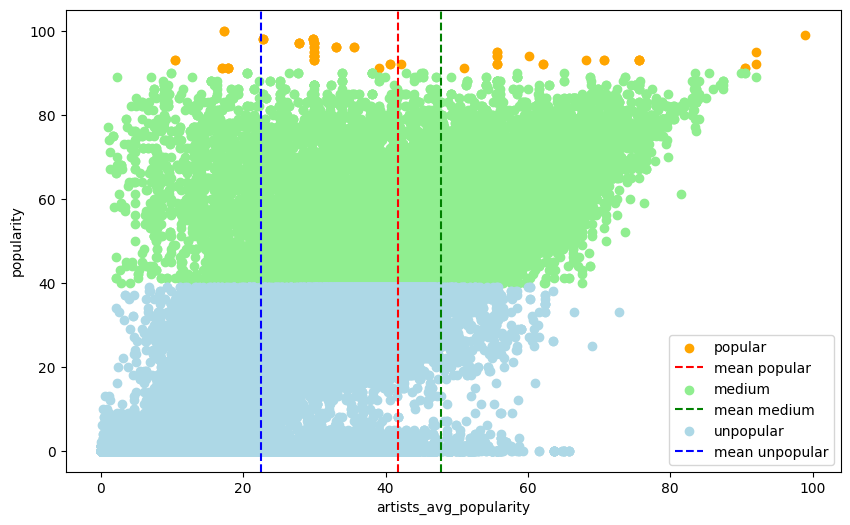

In [29]:
popular = working_data[working_data['popularity'] > 90]
unpopular = working_data[working_data['popularity'] < 40]
medium = working_data[working_data['popularity'] >= 40]
medium = medium[medium['popularity'] <= 90]

perfect_artists_avg_popularity = popular['artists_avg_popularity'].mean()

plt.figure(figsize=(10, 6))

plt.scatter(popular['artists_avg_popularity'], popular['popularity'], c='orange', label='popular')
plt.axvline(x=perfect_artists_avg_popularity, color='red', linestyle='--', label='mean popular')

plt.scatter(medium['artists_avg_popularity'], medium['popularity'], c='lightgreen', label='medium')
plt.axvline(x=medium['artists_avg_popularity'].mean(), color='green', linestyle='--', label='mean medium')

plt.scatter(unpopular['artists_avg_popularity'], unpopular['popularity'], c='lightblue', label='unpopular')
plt.axvline(x=unpopular['artists_avg_popularity'].mean(), color='blue', linestyle='--', label='mean unpopular')

plt.legend()

plt.xlabel('artists_avg_popularity')
plt.ylabel('popularity')

plt.show()

Зелёная линия имеет большую сребнюю популярность, чем красная. Следовательно можно сделать вывод, что не обязательно иметь хороший послужной список для популярности. Следовательно, можно не добавлять этот признак в датасет, тк он не будет иметь большой корреляции с Popularity. Но мы это проверим

### Топ жанров

Выведем топ жанров

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, 'metal'),
  Text(1, 0, 'british'),
  Text(2, 0, 'ambient'),
  Text(3, 0, 'pagode'),
  Text(4, 0, 'electronic'),
  Text(5, 0, 'brazil'),
  Text(6, 0, 'deep-house'),
  Text(7, 0, 'mandopop'),
  Text(8, 0, 'piano'),
  Text(9, 0, 'progressive-house'),
  Text(10, 0, 'pop'),
  Text(11, 0, 'sertanejo'),
  Text(12, 0, 'emo'),
  Text(13, 0, 'anime'),
  Text(14, 0, 'indian'),
  Text(15, 0, 'grunge'),
  Text(16, 0, 'sad'),
  Text(17, 0, 'chill'),
  Text(18, 0, 'k-pop'),
  Text(19, 0, 'pop-film')])

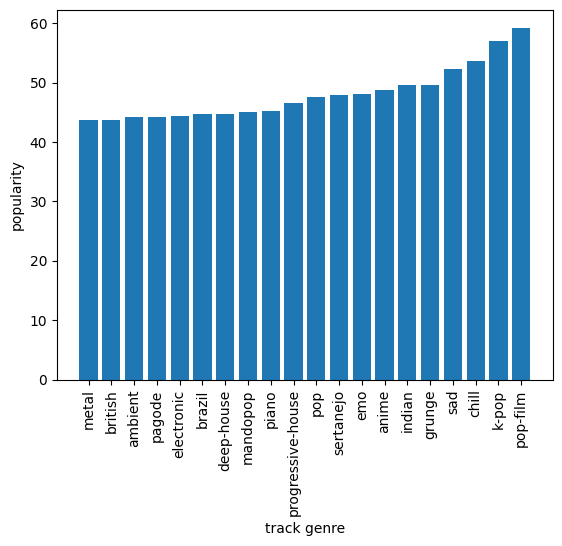

In [38]:
popular_track = origin_data.groupby('track_genre')['popularity'].mean()
best = pd.DataFrame(popular_track.sort_values().tail(20))

plt.bar(list(best.index), list(best.popularity))
plt.xlabel('track genre')
plt.ylabel('popularity')
plt.xticks(rotation=90)

Это топ 20 жанров по популярности, в топе pop-film, k-pop, cill, sad и тд

### Длина названия трека

Ну и на последок проверим поговорку "Краткость сестра таланта" и проверим зависимость популярности от длины названия

In [30]:
short = 0
short_cnt = 0
normal = 0
normal_cnt = 0
long = 0
long_cnt = 0
for i in origin_data.index:
  l = len(origin_data['track_name'][i])
  if l < 7:
    short += origin_data['popularity'][i]
    short_cnt += 1
  elif l < 17:
    normal += origin_data['popularity'][i]
    normal_cnt += 1
  else:
    long += origin_data['popularity'][i]
    long_cnt += 1

print(f'Short: {short/short_cnt}')
print(f'Normal: {normal/normal_cnt}')
print(f'Long: {long/long_cnt}')

Short: 37.22143497027445
Normal: 33.33713300711744
Long: 32.104044548651814


Наше предположение оправдалось треки с коротким названием в среднем более популярны!

Сделаем график

In [31]:
working_data['track_name_length'] = 0
for i in origin_data.index:
  working_data.loc[i, "track_name_length"] = len(origin_data['track_name'][i])

working_data['track_name_length']

,track_name_length
0,6
1,16
2,14
3,26
4,7
...,...
113995,19
113996,16
113997,14
113998,7


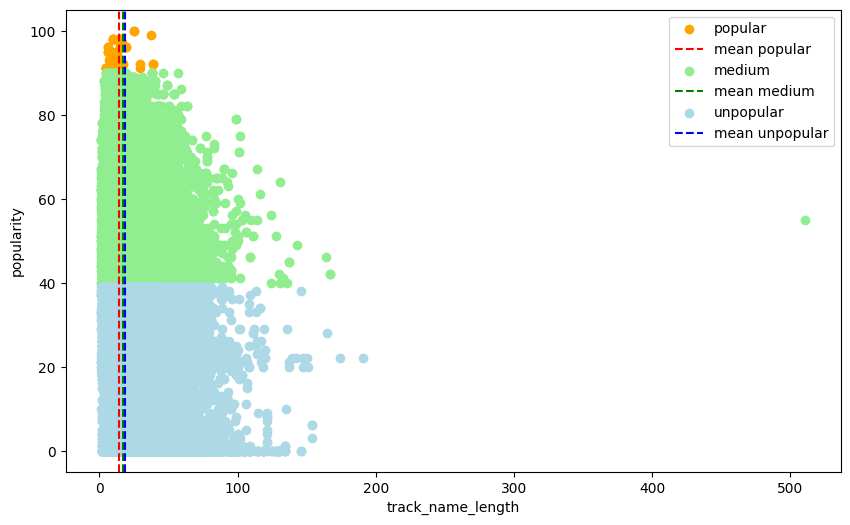

In [32]:
popular = working_data[working_data['popularity'] > 90]
unpopular = working_data[working_data['popularity'] < 40]
medium = working_data[working_data['popularity'] >= 40]
medium = medium[medium['popularity'] <= 90]

plt.figure(figsize=(10, 6))

plt.scatter(popular['track_name_length'], popular['popularity'], c='orange', label='popular')
plt.axvline(x=popular['track_name_length'].mean(), color='red', linestyle='--', label='mean popular')

plt.scatter(medium['track_name_length'], medium['popularity'], c='lightgreen', label='medium')
plt.axvline(x=medium['track_name_length'].mean(), color='green', linestyle='--', label='mean medium')

plt.scatter(unpopular['track_name_length'], unpopular['popularity'], c='lightblue', label='unpopular')
plt.axvline(x=unpopular['track_name_length'].mean(), color='blue', linestyle='--', label='mean unpopular')

plt.legend()

plt.xlabel('track_name_length')
plt.ylabel('popularity')

plt.show()

Выведем данные, где название меньше 100 символов

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


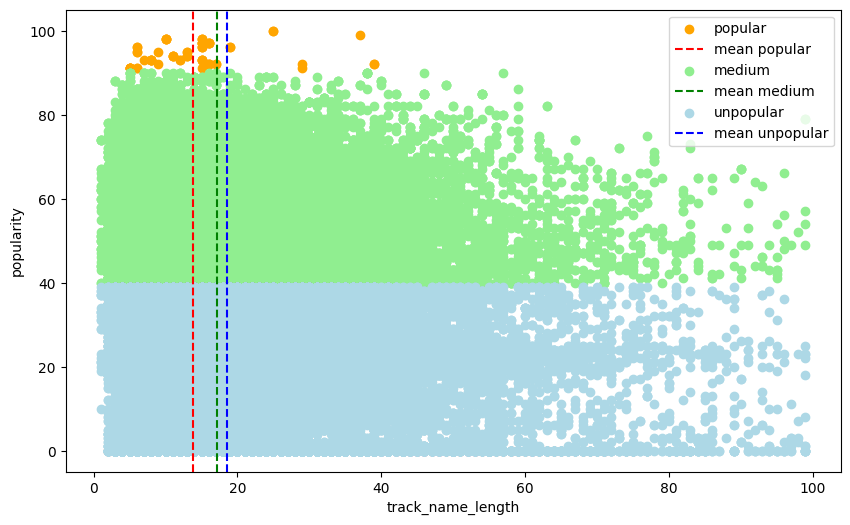

Типичная длина названия популярного трека 13.764705882352942


In [33]:
popular = working_data[working_data['popularity'] > 90]
unpopular = working_data[working_data['popularity'] < 40]
medium = working_data[working_data['popularity'] >= 40]
medium = medium[medium['popularity'] <= 90]

popular_med_track_name_length = popular['track_name_length'].mean()
medium_med_track_name_length = medium['track_name_length'].mean()
unpopular_med_track_name_length = unpopular['track_name_length'].mean()

popular = popular[popular['track_name_length'] < 100]
medium = medium[medium['track_name_length'] < 100]
unpopular = unpopular[unpopular['track_name_length'] < 100]

plt.figure(figsize=(10, 6))

plt.scatter(popular['track_name_length'], popular['popularity'], c='orange', label='popular')
plt.axvline(x=popular_med_track_name_length, color='red', linestyle='--', label='mean popular')

plt.scatter(medium['track_name_length'], medium['popularity'], c='lightgreen', label='medium')
plt.axvline(x=medium_med_track_name_length, color='green', linestyle='--', label='mean medium')

plt.scatter(unpopular['track_name_length'], unpopular['popularity'], c='lightblue', label='unpopular')
plt.axvline(x=unpopular_med_track_name_length, color='blue', linestyle='--', label='mean unpopular')

plt.legend()

plt.xlabel('track_name_length')
plt.ylabel('popularity')

plt.show()

print(f'Типичная длина названия популярного трека {popular_med_track_name_length}')

Разница между медианами маленькая, но она есть. Идеальные названия состоят из 6-20 символов, есть выбросы в 40 символов

## Feature engineering на основе нащих графиков

Сейчас мы создадим датасет в нём мы будем хранить числовые характеристики в формате удалённости от "типичных идеальных" значений, которые мы вывели выше

In [43]:
perfect_data = working_data

Удаляем значения, которые не имеют смысла:


1.   artists - мы сделали столбцы artists_cnt	и artists_avg_popularity, поэтому оригинал нам не нужен
2.   time_signature - слишком мало значений, да и отклонение медиан минимально, поэтому удаляем
3.  explicit - слишком мало значений, если будет большая важность вернём
4.  mode - тоже мало значений






In [44]:
perfect_data = perfect_data.drop(columns=['artists', 'time_signature', 'explicit', 'mode'])
perfect_data

,album_name,track_name,popularity,duration_ms,danceability,speechiness,instrumentalness,liveness,valence,tempo,track_genre,energy_loudness_acousticness,artists_cnt,artists_avg_popularity,track_name_length
0,8100,11741,73,230666,0.676,0.1430,0.000001,0.3580,0.7150,87.917,0,-3.009767,1,58.000000,6
1,14796,22528,55,149610,0.420,0.0763,0.000006,0.1010,0.2670,77.489,0,-0.217437,1,42.923077,16
2,39162,60774,57,210826,0.438,0.0557,0.000000,0.1170,0.1200,76.332,0,-2.760660,2,57.875000,14
3,8580,9580,71,201933,0.266,0.0363,0.000071,0.1320,0.1430,181.740,0,-0.104832,1,51.090909,26
4,16899,25689,82,198853,0.618,0.0526,0.000000,0.0829,0.1670,119.949,0,-2.277291,1,42.916667,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,66,53329,21,384999,0.172,0.0422,0.928000,0.0863,0.0339,125.995,113,-1.386848,1,23.500000,19
113996,66,65090,22,385000,0.174,0.0401,0.976000,0.1050,0.0350,85.239,113,-0.012859,1,23.500000,16
113997,5028,38207,22,271466,0.629,0.0420,0.000000,0.0839,0.7430,132.378,113,-0.476733,1,26.312500,14
113998,7238,21507,41,283893,0.587,0.0297,0.000000,0.2700,0.4130,135.960,113,-3.410587,1,32.289474,7


### Делаем чёрное дело

<p>Заменяем значения в столбиках их отклонением от медианы лучших треков, там где это имеет смысл</p>
<p>На пример заменять artists_avg_popularity его отклонением не имеет смысл, тк мы поняли, что этот столбец не имеет однозначной корреляции с популярностью (точнее значения самых популярных треков)</p>

In [45]:
perfect_data['duration_ms'] = abs(popular_med_duration_ms - working_data['duration_ms'])

perfect_danceability = working_data[working_data['popularity'] > 90]['danceability'].mean()
perfect_data['danceability'] = abs(perfect_danceability - working_data['danceability'])

perfect_speechiness = working_data[working_data['popularity'] > 90]['speechiness'].mean()
perfect_data['speechiness'] = abs(perfect_speechiness - working_data['speechiness'])

perfect_instrumentalness = working_data[working_data['popularity'] > 90]['instrumentalness'].mean()
perfect_data['instrumentalness'] = abs(perfect_instrumentalness - working_data['instrumentalness'])

perfect_liveness = working_data[working_data['popularity'] > 90]['liveness'].mean()
perfect_data['liveness'] = abs(perfect_liveness - working_data['liveness'])

perfect_data['track_name_length'] = abs(popular_med_track_name_length - working_data['track_name_length'])

perfect_energy_loudness_acousticness = working_data[working_data['popularity'] > 90]['energy_loudness_acousticness'].mean()
perfect_data['energy_loudness_acousticness'] = abs(perfect_liveness - working_data['energy_loudness_acousticness'])

perfect_data

,album_name,track_name,popularity,duration_ms,danceability,speechiness,instrumentalness,liveness,valence,tempo,track_genre,energy_loudness_acousticness,artists_cnt,artists_avg_popularity,track_name_length
0,8100,11741,73,28739.882353,0.044912,0.064194,0.002834,0.162475,0.7150,87.917,0,3.205292,1,58.000000,7.764706
1,14796,22528,55,52316.117647,0.300912,0.002506,0.002830,0.094525,0.2670,77.489,0,0.412962,1,42.923077,2.235294
2,39162,60774,57,8899.882353,0.282912,0.023106,0.002835,0.078525,0.1200,76.332,0,2.956185,2,57.875000,0.235294
3,8580,9580,71,6.882353,0.454912,0.042506,0.002765,0.063525,0.1430,181.740,0,0.300357,1,51.090909,12.235294
4,16899,25689,82,3073.117647,0.102912,0.026206,0.002835,0.112625,0.1670,119.949,0,2.472816,1,42.916667,6.764706
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,66,53329,21,183072.882353,0.548912,0.036606,0.925165,0.109225,0.0339,125.995,113,1.582373,1,23.500000,5.235294
113996,66,65090,22,183073.882353,0.546912,0.038706,0.973165,0.090525,0.0350,85.239,113,0.208384,1,23.500000,2.235294
113997,5028,38207,22,69539.882353,0.091912,0.036806,0.002835,0.111625,0.7430,132.378,113,0.672258,1,26.312500,0.235294
113998,7238,21507,41,81966.882353,0.133912,0.049106,0.002835,0.074475,0.4130,135.960,113,3.606112,1,32.289474,6.764706


### Проверка корреляции

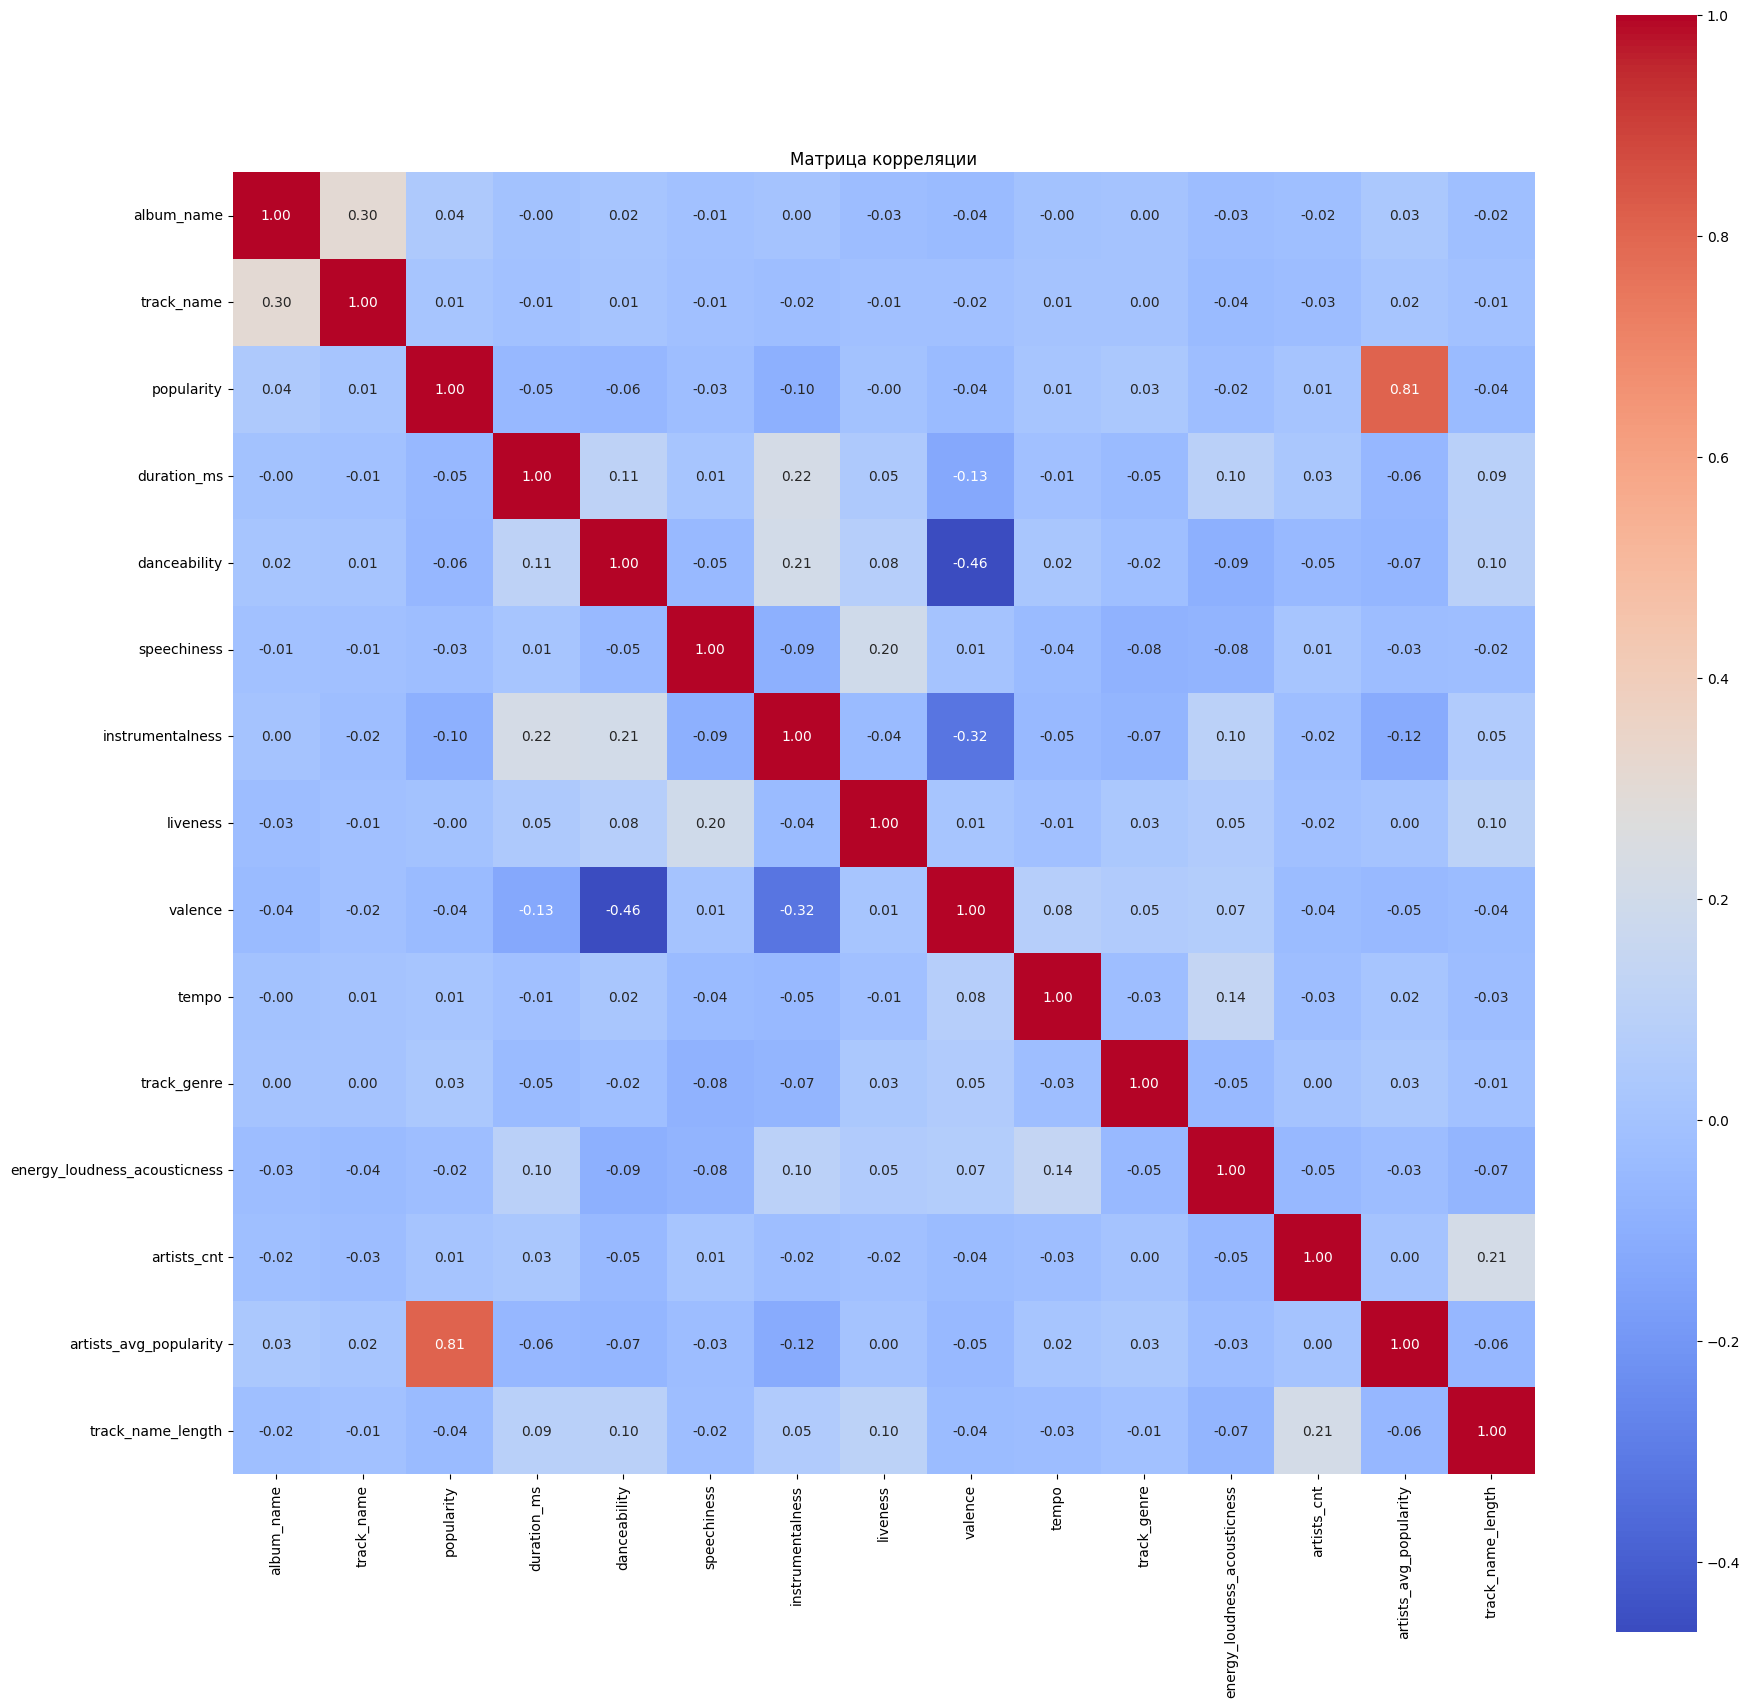

In [46]:
corr_matrix = perfect_data.corr()
plt.figure(figsize=(21, 21))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Матрица корреляции')
plt.show()

Особой корреляции с таргетом нет ни у чего, кроме artists_avg_popularity. Что логично, чем популярней исполнитель, тем больше просмотров у его треков, да и создан этот столбец с использованием таргета. Это довольно печально, видимо наша гипотеза о существовании идеальных параметров для песни не оправдалась или наша реализация была неудачной

## Feature engineering здорового человека

Ввиду странного распределения задач, в нашей команде появилось 2 Feature engineering-га. Поэтому мы и сделали 2 датаста.

### <b>Совпадающее название трека и альбома</b>

Названия, и трека, и альбома хорошо коррелируют с популярностью, возможно совпадающие названия будут коррелировать еще лучше

In [47]:
working_data.loc[working_data["album_name"] == working_data["track_name"], "is_same_album"] = True

working_data["is_same_album"] = working_data["is_same_album"].fillna(False)

<ipython-input-47-aeaf2337a061>:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  working_data["is_same_album"] = working_data["is_same_album"].fillna(False)


### <b>Danceability и energy</b>

Анализ показал, что danceability и energy прямопропорцианальны популярности на определенных отрезках, создадим соответствующий признак

In [48]:
working_data["dance_energy"] = data["danceability"] * data["energy"]

### <b>Корреляция новых признаков с таргетом</b>

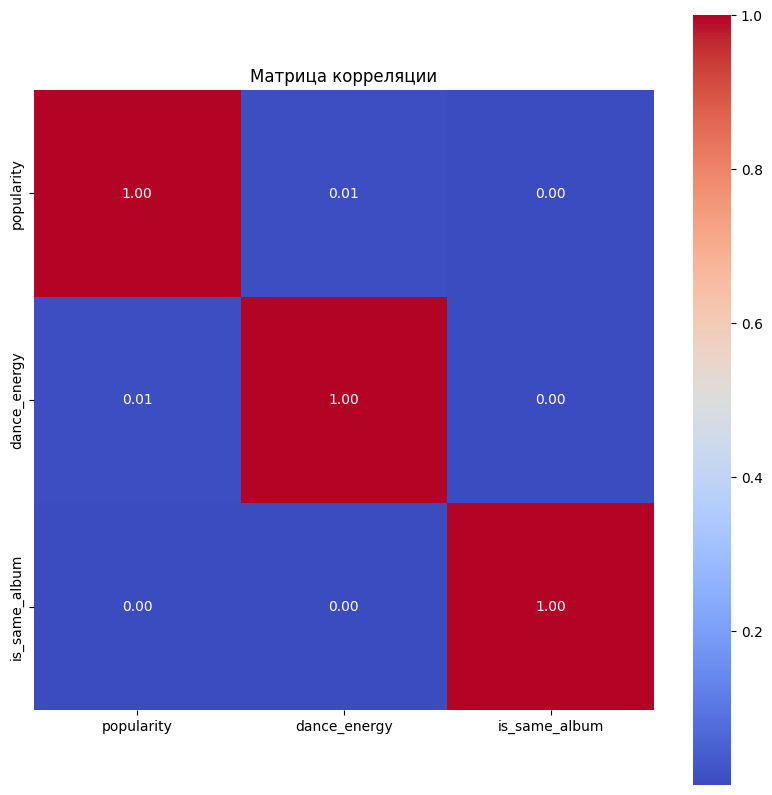

In [49]:
corr_matrix = working_data[['popularity','dance_energy','is_same_album']].corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Матрица корреляции')
plt.show()

Тут тоже особой ваимосвязи не найдено

## Feature importance

### Data

Проверим оригинальный датасет, для того чтобы понять какие выведенные нами признаки улучшат обучение

In [50]:
#Разделяю на обучающие и тестовые выборки
X = data.drop(columns=['popularity']) #Обучающий без целевого признака
y = data['popularity'] #Тестовый только popularity
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42) #Делим 80% на 20%

In [51]:
import tensorflow as tf
from tensorflow import keras

In [52]:
scaler = StandardScaler() #Масштабируем данные
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#Строим модель. Трёхслойная архитектура 1ый - входной, 2ой - скрытый, 3й - выходной
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error') #Стандартные для регресси параметры

model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

loss = model.evaluate(X_test, y_test)
print(f'Тестовый loss: {loss}')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 617.7695 - val_loss: 478.2612
Epoch 2/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 471.4577 - val_loss: 467.3410
Epoch 3/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 456.6923 - val_loss: 458.6187
Epoch 4/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 451.7279 - val_loss: 454.2918
Epoch 5/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 444.3040 - val_loss: 448.8049
Epoch 6/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 438.9856 - val_loss: 443.6383
Epoch 7/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 434.7866 - val_loss: 440.7216
Epoch 8/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 430.6238 - val_loss: 439.2552
Epoch 9/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 424.8184 - val_loss: 433.7194
Epoch 10/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 419.9178 - val_loss: 432.4671
713/713 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 433.2800
Тестовый loss: 426.84

In [53]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from sklearn.inspection import permutation_importance

In [54]:
#Прогнозирование на тестовой выборке
y_pred = model.predict(X_test)

#Вычисление метрик
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5

print(f'MAE: {mae}')
print(f'RMSE: {rmse}')

713/713 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
MAE: 16.636861976474002
RMSE: 20.660125740948242


In [55]:
mape = mean_absolute_percentage_error(y_test, y_pred)
print(f'MAPE: {mape}')

MAPE: 1.951569717601892e+16


713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━

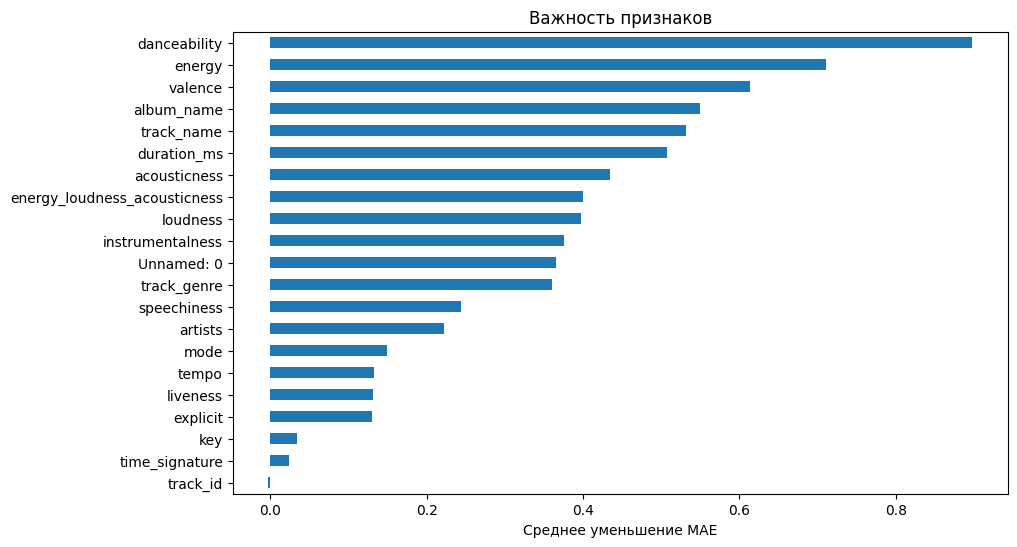

In [56]:
#Важность признаков с помощью permutation importance
result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42, scoring='neg_mean_absolute_error')
importances = pd.Series(result.importances_mean, index=X.columns)

#Визуализация важности признаков
importances.sort_values().plot(kind='barh', figsize=(10,6))
plt.title('Важность признаков')
plt.xlabel('Среднее уменьшение MAE')
plt.show()

Замечания: В этом датасете остались ненужные колонки track_id и unnamed: 0, а также есть колонки дублирующие energy_loudness_acousticness

Мы получили информацию permutation_importance нашего почти оригиального датасета, теперь сравним с остальными

### perfect_data

In [57]:
#Разделяю на обучающие и тестовые выборки
X = perfect_data.drop(columns=['popularity']) #Обучающий без целевого признака
y = perfect_data['popularity'] #Тестовый только popularity
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42) #Делим 80% на 20%

In [58]:
scaler = StandardScaler() #Масштабируем данные
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#Строим модель. Трёхслойная архитектура 1ый - входной, 2ой - скрытый, 3й - выходной
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error') #Стандартные для регресси параметры

model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

loss = model.evaluate(X_test, y_test)
print(f'Тестовый loss: {loss}')

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2280/2280 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 401.2363 - val_loss: 171.4628
Epoch 2/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 173.2222 - val_loss: 168.9978
Epoch 3/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 166.4644 - val_loss: 167.4664
Epoch 4/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 169.4132 - val_loss: 167.3126
Epoch 5/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 165.9585 - val_loss: 166.0255
Epoch 6/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 164.5800 - val_loss: 165.7352
Epoch 7/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 167.9157 - val_loss: 165.2665
Epoch 8/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 165.4151 - val_loss: 164.9327
Epoch 9/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 166.1534 - val_loss: 165.3319
Epoch 10/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 165.2837 - val_loss: 166.5035
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 168.0866
Тестовый loss: 169.1893920898437

Тестовый loss выглядит просто шикарно, но как потом окажется, я зря рабовался

In [59]:
#Прогнозирование на тестовой выборке
y_pred = model.predict(X_test)

#Вычисление метрик
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5

print(f'MAE: {mae}')
print(f'RMSE: {rmse}')

713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
MAE: 8.141932944139107
RMSE: 13.007282249165835


In [60]:
mape = mean_absolute_percentage_error(y_test, y_pred)
print(f'MAPE: {mape}')

MAPE: 7925980884176801.0


713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━

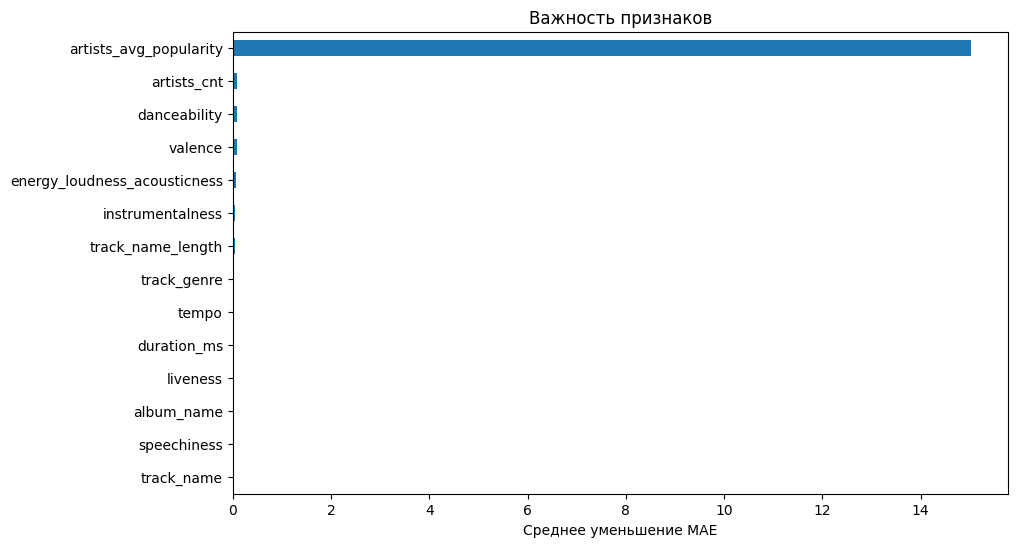

In [61]:
#Важность признаков с помощью permutation importance
result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42, scoring='neg_mean_absolute_error')
importances = pd.Series(result.importances_mean, index=X.columns)

#Визуализация важности признаков
importances.sort_values().plot(kind='barh', figsize=(10,6))
plt.title('Важность признаков')
plt.xlabel('Среднее уменьшение MAE')
plt.show()

<p>Что случилось?</p>
<p>С самого начала в датасете был проблемный параметр - artists_avg_popularity. Как мы заметили раньше в топы чатсо попадали исполнители и с маленьким послужным списком, что не позволет нам говорить о нормальной с популярностью корреляции. Однако, этот показатель основывается на таргете, что и делает среднее уменьшение mae таким большим</p>
<p>Теперь стало очевидно, что параметр artists_avg_popularity сломал нам всю картину, удалим этот параметр, так как он слишком крутой</p>

### perfect_data но без artists_avg_popularity

In [62]:
perfect_data = perfect_data.drop(columns=['artists_avg_popularity'])

In [63]:
#Разделяю на обучающие и тестовые выборки
X = perfect_data.drop(columns=['popularity']) #Обучающий без целевого признака
y = perfect_data['popularity'] #Тестовый только popularity
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42) #Делим 80% на 20%

In [64]:
scaler = StandardScaler() #Масштабируем данные
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#Строим модель. Трёхслойная архитектура 1ый - входной, 2ой - скрытый, 3й - выходной
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error') #Стандартные для регресси параметры

model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

loss = model.evaluate(X_test, y_test)
print(f'Тестовый loss: {loss}')

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2280/2280 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 652.3058 - val_loss: 479.6776
Epoch 2/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 475.1192 - val_loss: 469.0402
Epoch 3/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 461.2198 - val_loss: 461.3786
Epoch 4/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 457.5829 - val_loss: 459.2351
Epoch 5/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 447.9275 - val_loss: 450.4394
Epoch 6/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 442.4747 - val_loss: 443.4091
Epoch 7/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 438.5255 - val_loss: 441.4521
Epoch 8/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 434.0882 - val_loss: 436.2608
Epoch 9/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 427.0297 - val_loss: 434.2867
Epoch 10/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 423.8089 - val_loss: 434.4578
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 435.9596
Тестовый loss: 431.7444763183594

Тестовый loss у этой модельки чуть меньше чем у оригинального датасета, что уже не плохо!

In [65]:
#Прогнозирование на тестовой выборке
y_pred = model.predict(X_test)

#Вычисление метрик
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5

print(f'MAE: {mae}')
print(f'RMSE: {rmse}')

713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
MAE: 17.009864882118347
RMSE: 20.778460978736614


In [66]:
mape = mean_absolute_percentage_error(y_test, y_pred)
print(f'MAPE: {mape}')

MAPE: 1.840406815976571e+16


Это уже говорит о многом, mape просто запредельный

713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━

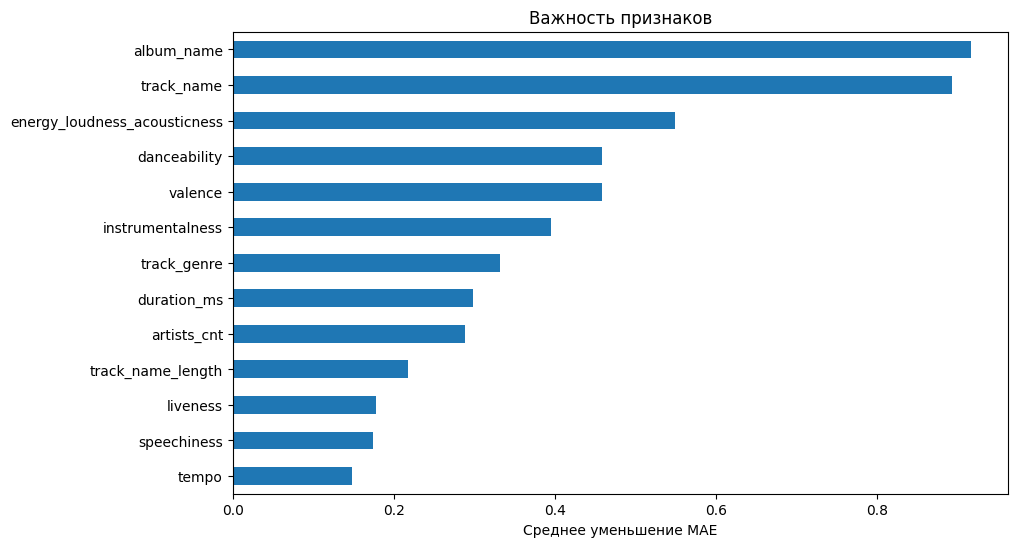

In [67]:
#Важность признаков с помощью permutation importance
result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42, scoring='neg_mean_absolute_error')
importances = pd.Series(result.importances_mean, index=X.columns)

#Визуализация важности признаков
importances.sort_values().plot(kind='barh', figsize=(10,6))
plt.title('Важность признаков')
plt.xlabel('Среднее уменьшение MAE')
plt.show()

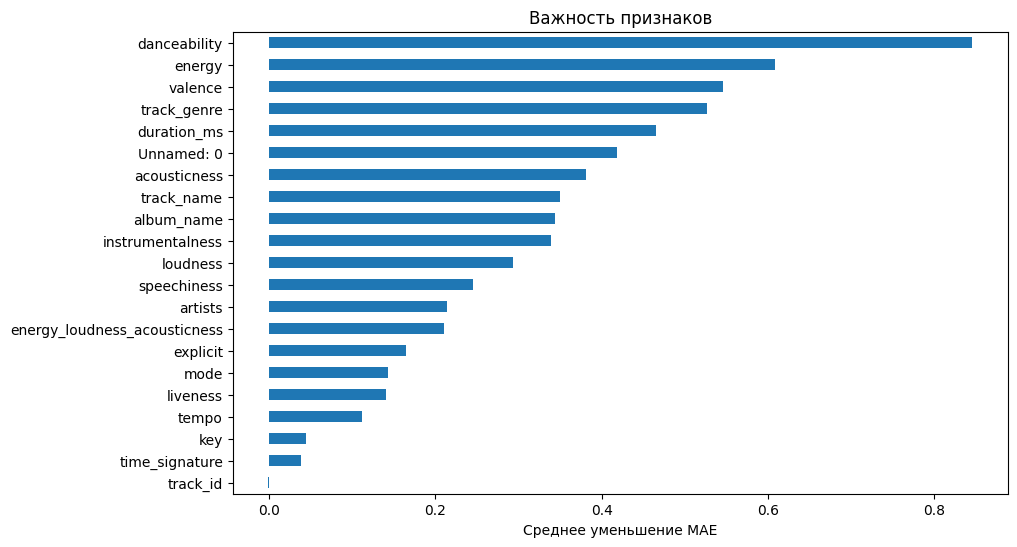

Очень странно, что название альбома и трека в данном датасете имеют такое большое среднее уменьшение mae, в сравнении с оригиналом, хоть кодировали его мы также. Да и изменение метрик, через удаление от среднего значения идеальных показателей результатов не дало, а многие значения и вовсе упали

Возможно, если следующий датасет не покажет значения лучше, нам придётся использовать perfect_data с "читерской" колонкой, так как показатели данной модели попросту выше

### working_data

Удаляем artists_avg_popularity, чтобы неполучить perfect_data 2.0

In [68]:
working_data = working_data.drop(columns=['artists_avg_popularity'])

Пришла очередь и этого датасета

In [69]:
#Разделяю на обучающие и тестовые выборки
X = working_data.drop(columns=['popularity']) #Обучающий без целевого признака
y = working_data['popularity'] #Тестовый только popularity
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42) #Делим 80% на 20%

In [70]:
scaler = StandardScaler() #Масштабируем данные
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#Строим модель. Трёхслойная архитектура 1ый - входной, 2ой - скрытый, 3й - выходной
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error') #Стандартные для регресси параметры

model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

loss = model.evaluate(X_test, y_test)
print(f'Тестовый loss: {loss}')

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2280/2280 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 642.6657 - val_loss: 477.4666
Epoch 2/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 459.1496 - val_loss: 457.8631
Epoch 3/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 446.6369 - val_loss: 451.3224
Epoch 4/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 438.5523 - val_loss: 442.7444
Epoch 5/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 431.4293 - val_loss: 438.8285
Epoch 6/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 425.5031 - val_loss: 437.5268
Epoch 7/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 426.4785 - val_loss: 432.8476
Epoch 8/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 414.5790 - val_loss: 427.6805
Epoch 9/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 413.1902 - val_loss: 429.1771
Epoch 10/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 411.3264 - val_loss: 425.6406
713/713 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 422.0501
Тестовый loss: 418.1813049316406

Показатели примерно такиеже как и у perfect_data без artists_avg_popularity, что не так уж и плохо

In [71]:
#Прогнозирование на тестовой выборке
y_pred = model.predict(X_test)

#Вычисление метрик
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5

print(f'MAE: {mae}')
print(f'RMSE: {rmse}')

713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
MAE: 16.503160228912243
RMSE: 20.449484779839537


In [72]:
mape = mean_absolute_percentage_error(y_test, y_pred)
print(f'MAPE: {mape}')

MAPE: 1.7817834126664444e+16


713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━

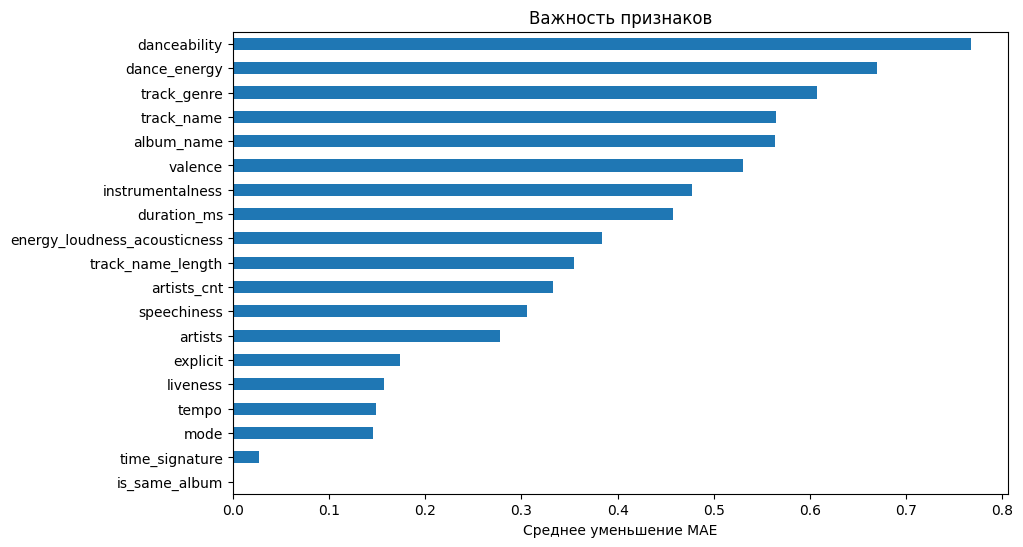

In [73]:
#Важность признаков с помощью permutation importance
result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42, scoring='neg_mean_absolute_error')
importances = pd.Series(result.importances_mean, index=X.columns)

#Визуализация важности признаков
importances.sort_values().plot(kind='barh', figsize=(10,6))
plt.title('Важность признаков')
plt.xlabel('Среднее уменьшение MAE')
plt.show()

Из всех добавленых нами параметров хорошо себя показал dance_energy, этот показатель смог стать 2ым по важности в датасете

<p>Нами было принято решение оставить working_data как пример обычного датасета, без таргет переменных в в нём.</p>
<p>Но также если наши модели не будут показывать достойных результатов, то мы вернём в датасет artists_avg_popularity</p>

## Модели

### Линейная регрессия

In [74]:
from sklearn.linear_model import LinearRegression

In [75]:
X = working_data.drop(columns=['popularity']) #Обучающий без целевого признака
y = working_data['popularity'] #Тестовый только popularity
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42) #Делим 80% на 20%

scaler = StandardScaler() #Масштабируем данные
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae_lr = mean_absolute_error(y_test, y_pred)
mse_lr = mean_squared_error(y_test, y_pred)
rmse_lr = mse_lr ** 0.5
mape_lr = mean_absolute_percentage_error(y_test, y_pred)

print(f'MAE: {mae_lr}')
print(f'MSE: {mse_lr}')
print(f'RMSE: {rmse_lr}')
print(f'MAPE: {mape_lr}')

MAE: 18.295311091729335
MSE: 482.3078745223844
RMSE: 21.961508930908742
MAPE: 2.126209346783505e+16


<p>MAE: 18.295311091729335</p>
<p>MSE: 482.3078745223844</p>
<p>RMSE: 21.961508930908742</p>
<p>MAPE: 2.126209346783505e+16</p>

Это самая простая модель, быстро обучается, но результат получился довольно слабый. Возможно, для неё больше подойдёт датасет perfect_data, тк значения в нём построены на основе удаления собственного значения столбца от "идеальных", что больше вырожает их линейную природу. Однако таблица корреляции perfect_data говорит нам об обратном

### Деревья

In [76]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

In [77]:
X = working_data.drop(columns=['popularity']) #Обучающий без целевого признака
y = working_data['popularity'] #Тестовый только popularity
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42) #Делим 80% на 20%

scaler = MinMaxScaler() #Масштабируем данные
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

tree_model = DecisionTreeRegressor(
    max_depth = 10,
    min_samples_split = 5,
    min_samples_leaf = 2,
    random_state = 42
)
tree_model.fit(X_train, y_train)

y_pred = tree_model.predict(X_test)

mae_tree = mean_absolute_error(y_test, y_pred)
mse_tree = mean_squared_error(y_test, y_pred)
rmse_tree = mse_tree ** 0.5
mape_tree = mean_absolute_percentage_error(y_test, y_pred)
r2_tree = r2_score(y_test, y_pred)

print(f'MAE: {mae_tree}')
print(f'MSE: {mse_tree}')
print(f'RMSE: {rmse_tree}')
print(f'MAPE: {mape_tree}')
print(f'R^2: {r2_tree}')

MAE: 15.871168756295095
MSE: 405.4060695074149
RMSE: 20.13469814790912
MAPE: 1.597342465466773e+16
R^2: 0.18279646884287237


<p>MAE: 15.871168756295095</p>
<p>MSE: 405.4060695074149</p>
<p>RMSE: 20.13469814790912</p>
<p>MAPE: 1.597342465466773e+16</p>
<p>R^2: 0.18279646884287237</p>

Модель дерева показала себя куда лучше, но всё равно не достаточно. Главный её плюс - скорость! Улучшать её мы не видим смысла, так как наши фавориты ещё впереди

### Нейронная сеть

In [78]:
from sklearn.neural_network import MLPRegressor

In [79]:
X = working_data.drop(columns=['popularity']) #Обучающий без целевого признака
y = working_data['popularity'] #Тестовый только popularity
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42) #Делим 80% на 20%

scaler = StandardScaler() #Масштабируем данные
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

mlp_model = MLPRegressor(
    hidden_layer_sizes = (100, 50, 25),
    max_iter = 1000,
    random_state = 42,
    solver = 'adam',
    learning_rate_init = 0.001,
    tol = 1e-4
)
mlp_model.fit(X_train, y_train)

predictions = mlp_model.predict(X_test)

mae_mlp = mean_absolute_error(y_test, predictions)
mse_mlp = mean_squared_error(y_test, predictions)
rmse_mlp = mse ** 0.5
mape_mlp = mean_absolute_percentage_error(y_test, predictions)
r2_mlp = r2_score(y_test, predictions)

print(f'MAE: {mae_mlp}')
print(f'MSE: {mse_mlp}')
print(f'RMSE: {rmse_mlp}')
print(f'MAPE: {mape_mlp}')
print(f'R^2: {r2_mlp}')

MAE: 14.970817960477026
MSE: 367.0926667656163
RMSE: 20.449484779839537
MAPE: 1.3046750357828898e+16
R^2: 0.2600273007573668


<p>MAE: 14.970817960477026</p>
<p>MSE: 367.0926667656163</p>
<p>RMSE: 20.449484779839537</p>
<p>MAPE: 1.3046750357828898e+16</p>
<p>R^2: 0.2600273007573668</p>

Модель показаля себя крайне хорошо, однако обучение было длительным. Сейчас это - наша лучшая модель. Рассмотрим ещё одну и сравним их!

### Градиентный бустинг

In [80]:
from sklearn.ensemble import GradientBoostingRegressor

In [81]:
X = working_data.drop(columns=['popularity']) #Обучающий без целевого признака
y = working_data['popularity'] #Тестовый только popularity
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42) #Делим 80% на 20%

gradient_boosting = GradientBoostingRegressor(
    learning_rate = 0.01,
    n_estimators = 500,
    max_depth = 10,
    # min_samples_leaf = 2,
    # min_samples_split = 5,
    # alpha = 0.1
)
gradient_boosting.fit(X_train, y_train)

y_pred = gradient_boosting.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
mape = mean_absolute_percentage_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAPE: {mape}')
print(f'R^2: {r2}')

MAE: 11.740423918242977
MSE: 237.62355827904665
RMSE: 15.415043246097191
MAPE: 1.1458389161013526e+16
R^2: 0.5210066510654282


Загружалось 28 минут, но и показатели довольно не плохие

<p>MAE: 11.740423918242977</p>
<p>MSE: 237.62355827904665</p>
<p>RMSE: 15.415043246097191</p>
<p>MAPE: 1.1458389161013526e+16</p>
<p>R^2: 0.5210066510654282</p>

Тирлист моделей:


1.   Модель градиентного бустинга mse - 237
2.   Нейронная сеть mse - 367
3.   Дерево mse - 405
4.   Линейная модель - mse - 482



Получившаяся модель градиентного бустинга нас устраивает, поэтому добавлять в датасет колонку artists_avg_popularity мы не будем

## Кросс-валидация лучшей модели

Проведём кросс-валидацию градиентного бустинга на 5ти фолдах

In [82]:
from sklearn.model_selection import cross_val_score

In [83]:
cv_mse = cross_val_score(gradient_boosting, X_train, y_train, cv = 5, scoring = 'neg_mean_squared_error')
cv_mae = cross_val_score(gradient_boosting, X_train, y_train, cv = 5, scoring = 'neg_mean_absolute_error')
cv_r2 = cross_val_score(gradient_boosting, X_train, y_train, cv = 5, scoring = 'r2')

cv_mse = -cv_mse
cv_mae = -cv_mae

print(f'mae: {np.mean(cv_mae)} ± {np.std(cv_mae)}')
print(f'mse: {np.mean(cv_mse)} ± {np.std(cv_mse)}')
print(f'r2: {np.mean(cv_r2)} ± {np.std(cv_r2)}')

mae: 11.783840406756983 ± 0.1287962070623241
mse: 240.98510408477364 ± 4.114154541746161
r2: 0.5154830333901202 ± 0.004516469985537712


ОООООООООчень долго считается (

<p>mae: 11.783840406756983 ± 0.1287962070623241</p>
<p>mse: 240.98510408477364 ± 4.114154541746161</p>
<p>r2: 0.5154830333901202 ± 0.004516469985537712</p>

Значения у итоговой модели получились неплохие, у нас получилось не переобучить модель об этом говорит небольшое отклонение показателей кросс-валидации от показателей модели

Это был наш первый проект связанный с нейронными сетями, поэтому возможно наши комментарии покажутся вам скупыми, но мы старались объяснить всё так, как понимаем сами. Хоть понимаем мы мало

Кросс-валидация была последним незакрытым поинтом, потому проект можно считать законченным.

Наша команда:

1.   Ахмадалиев Савелий Батырбекович - сделал анализ и помогал с датасетом на его основе (perfect_data)
2.   Курбанов Сулаймон Талатович - сделал perfect_data и помогал с анализом
3.   Вахромеев Василий Алексеевил - сделал датасет здорового человека, пытался объяснить, что анализ так себе и что колонка не должна содержать в себе таргет
4.   Умяров Александр Дмитриевич - помогал с анализом датасетов и моделями + сделал графики читаемыми
5.   Маклецов Владимир Владимирович - писал модели, писал отчёты

